  
  <font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Projeto Database airBnB </div> </font> \
 
\vspace{.1in}
  
   <font size="5"> Licenciatura em Ciência de Dados- 2º ano, 1º semestre </font>
  \vspace{.05in}
  
  
  <font size="4"> Allan Kardec da Silva Rodrigues Nº103380 

  <font size="4">Diogo Alexandre Alonso de Freitas Nº104841 

  <font size="4">João Francisco Marques Gonçalves da Silva Botas Nº104782 

  <font size="4">Pedro Brígido Machado Nº98601 </font>
  \vspace{.05in}
  
  <font size="4"> **ISCTE-IUL, 2 de novembro de 2022** </font>
  \vspace{.05in} 
 
   \vspace{.05in}
  <font size="5"> <div class="alert alert-success" role="alert"> Cidade de Sevilla </div></font> 
 
  \vspace{.05in}
  <font size="2"> *Nota*: Foi utilizado o nbextensions para formatação e estética do código. </font>
  \vspace{.05in}

Em primeiro lugar, serão importadas as bibliotecas necessárias para a realização do projeto, que incluem as funções do R prefenidas para automatização de testes, de modelos ou de formatação.

In [1]:
library(car)  # para bases de dados e gráficos
library(lmtest)  # para testes de hipótese sobre os pressupostos dos resíduos
library(MASS)
# usar para fazer a escolha automática do modelo de regressão (stepAIC)
# com base no critério de informação de Akaike (AIC)
library(olsrr)  # para regressão (e testes de hipótese)
library(tseries)  # teste de Jarque-Bera
library(corrplot) 
library(ggplot2)   
library(tidyr)
library(flextable)
library(caTools)

Loading required package: carData

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'olsrr'


The following object is masked from 'package:MASS':

    cement


The following object is masked from 'package:datasets':

    rivers


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

corrplot 0.92 loaded



Após a importação das bibliotecas iremos importar a base de dados através do ficheiro disponibilizado para análise (**listing.csv**), relativamente à cidade de Sevilha. Depois serão mostrados os primeiros 10 registos utilizando a função *head*.

In [2]:
sevilla <- read.csv("listings.csv")
head(sevilla,10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1,32347,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,168,2020-01-08,1.18,1,117,0,CTC-2018150852
2,49287,BEAUTIFUL APARTMENT IN SEVILLE,224697,Walter,Casco Antiguo,San Lorenzo,37.39898,-5.99533,Entire home/apt,75,3,42,2020-02-17,0.30,1,241,0,VFT/SE/01116
3,94187,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,503692,Margot,Casco Antiguo,San Bartolomé,37.38816,-5.98537,Private room,79,2,86,2022-06-06,0.64,6,360,11,H/SE/01244
4,108236,Sunny apt in heart of seville!!,560040,Pepe,Casco Antiguo,San Lorenzo,37.39794,-5.99795,Entire home/apt,84,2,160,2022-09-19,1.16,2,44,8,VFT/SE/05126
5,108568,TERRACE ALAMEDA. WIFI GARAGE DOWNTOWN,589600,Miguel,Casco Antiguo,San Lorenzo,37.39941,-5.99379,Entire home/apt,85,3,103,2022-09-08,0.77,10,119,22,VFT/SE/00748
6,116703,"Walk to the Cathedral!! ATICO DUPLEX, WIFI.",589600,Miguel,Casco Antiguo,Arenal,37.38551,-5.99497,Entire home/apt,83,3,212,2022-09-08,1.54,10,313,40,VFT/SE/00834
7,117278,"Walk to the Cathedral!! DUPLEX ARENAL, WIFI.",589600,Miguel,Casco Antiguo,Arenal,37.38549,-5.99506,Entire home/apt,78,3,132,2022-09-11,0.97,10,339,26,CTC-2018177111
8,159596,apto lujo 2 D en el Arenal (Sevilla),629861,Alvaro,Casco Antiguo,Arenal,37.38671,-5.99581,Entire home/apt,106,64,1,2019-11-24,0.03,2,22,0,
9,179629,Bamberg Duplex Private Terrace Old town 5 pax,860055,Maria,Casco Antiguo,Santa Cruz,37.38731,-5.99095,Entire home/apt,150,3,167,2022-09-11,1.28,23,231,13,VFT/SE/0426


Ao olharmos atentamente para as linhas representadas acima, vemos que o id não nos dá nenhuma indicação sobre as restantes colunas da base de dados, pelo que pode ser apenas um identificador único para cada linha.
De forma a confirmar isso, faremos uma igualdade entre o número de colunas da base de dados (com **nrow**) e os valores únicos diferentes, utilizando o **length(unique())**.

In [3]:
length(unique(sevilla$id))==nrow(sevilla)

[1] TRUE

Como já era esperado, o comando retornou **TRUE** e, por isso, podemos eliminar a coluna visto que não traz nenhuma informação adicional para **o objetivo pretendido**.

In [4]:
sevilla$id <- NULL

Foi retirada a coluna id da nossa base de dados, guardada na variável Sevilla, pois esta não acrescenta nada de adicional.
Agora será feito **str** para extrair o tipo de dados em cada coluna, de modo a ver quais poderão ser interessantes de analisar num modelo. Ainda, será utilizado o **apply(is.na())** para averiguar eventuais NA nas nossas variáveis.  

In [5]:
str(sevilla)

'data.frame':	6494 obs. of  17 variables:
 $ name                          : chr  "Explore Cultural Sights from a Family-Friendly Apartment" "BEAUTIFUL APARTMENT IN SEVILLE" "(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE" "Sunny apt in heart of seville!!" ...
 $ host_id                       : int  139939 224697 503692 560040 589600 589600 589600 629861 860055 860055 ...
 $ host_name                     : chr  "Alejandro" "Walter" "Margot" "Pepe" ...
 $ neighbourhood_group           : chr  "Casco Antiguo" "Casco Antiguo" "Casco Antiguo" "Casco Antiguo" ...
 $ neighbourhood                 : chr  "San Vicente" "San Lorenzo" "San Bartolomé" "San Lorenzo" ...
 $ latitude                      : num  37.4 37.4 37.4 37.4 37.4 ...
 $ longitude                     : num  -6 -6 -5.99 -6 -5.99 ...
 $ room_type                     : chr  "Entire home/apt" "Entire home/apt" "Private room" "Entire home/apt" ...
 $ price                         : int  99 75 79 84 85 83 78 106 150 115 ...
 $ minim

In [6]:
apply(is.na(sevilla),2,which)

$name
integer(0)

$host_id
integer(0)

$host_name
integer(0)

$neighbourhood_group
integer(0)

$neighbourhood
integer(0)

$latitude
integer(0)

$longitude
integer(0)

$room_type
integer(0)

$price
integer(0)

$minimum_nights
integer(0)

$number_of_reviews
integer(0)

$last_review
integer(0)

$reviews_per_month
  [1]   66   69   73  118  143  169  171  178  194  403  419  438  499  512  570
 [16]  865  871  878  879  904 1006 1007 1010 1046 1187 1347 1375 1410 1411 1425
 [31] 1621 1709 1710 1713 1714 1753 1976 1997 2112 2161 2174 2176 2177 2178 2179
 [46] 2180 2181 2185 2302 2305 2352 2365 2374 2454 2499 2500 2537 2558 2563 2567
 [61] 2568 2580 2588 2593 2596 2612 2613 2634 2661 2667 2682 2724 2747 2792 2865
 [76] 2878 2880 2894 2910 2911 2912 2913 2916 2918 2919 2923 2953 2965 2966 2968
 [91] 2969 2991 3004 3005 3006 3007 3008 3009 3021 3044 3051 3112 3118 3165 3197
[106] 3200 3256 3258 3314 3315 3336 3346 3358 3373 3379 3397 3402 3403 3445 3464
[121] 3473 3479 3526 3527 3534 3539 3577 3578 3580 3598 3601 3604 3610 3620 3633
[136] 3634 3637 3646 3650 3657 3658 3660 3661 3669 3693 3697 3703 3704 3711 3717
[151] 3726 3728 3729 3734 3737 3745 3748 3749 3753 3768 3771 3772 3774 3777 3779
[166] 3784 3787 3788 3789 3790 3797 3799 3803 3804 3808 3809 3811 3813 3815 3817
[181] 3819 3820 3821 3830 3839 3840 3862 3863 3865 3867 3868 3869 3870 3871 3874
[196] 3875 3876 3877 3878 3879 3880 3881 3882 3883 3884 3885 3886 3887 3888 3889
[211] 3890 3891 3892 3900 3915 3916 3917 3919 3921 3929 3930 3931 3932 3933 3934
[226] 3935 3936 3937 3938 3940 3942 3943 3945 3946 3949 3950 3951 3954 3955 3958
[241] 3959 3960 3964 3965 3966 3969 3971 3978 3986 3987 3998 4000 4003 4006 4013
[256] 4025 4026 4029 4032 4038 4051 4066 4069 4076 4096 4099 4109 4121 4122 4123
[271] 4126 4129 4138 4139 4142 4145 4146 4157 4168 4177 4197 4228 4236 4239 4248
[286] 4253 4261 4263 4264 4272 4277 4288 4301 4309 4314 4323 4325 4374 4381 4382
[301] 4383 4384 4385 4386 4409 4425 4447 4450 4455 4458 4571 4576 4584 4585 4586
[316] 4589 4590 4594 4596 4597 4604 4615 4624 4674 4686 4709 4725 4731 4747 4760
[331] 4761 4768 4783 4802 4857 4914 4915 4918 4929 4931 4935 4969 4974 4979 4980
[346] 4981 4991 4992 5028 5050 5067 5071 5073 5075 5076 5094 5101 5103 5104 5105
[361] 5109 5112 5143 5145 5146 5147 5149 5153 5155 5156 5167 5170 5171 5173 5175
[376] 5182 5183 5192 5213 5214 5215 5217 5218 5219 5220 5222 5223 5237 5238 5244
[391] 5245 5246 5270 5292 5295 5306 5322 5323 5327 5335 5343 5360 5371 5374 5383
[406] 5384 5392 5401 5402 5403 5404 5405 5406 5407 5408 5415 5436 5446 5453 5467
[421] 5472 5478 5489 5500 5509 5528 5534 5538 5542 5543 5549 5562 5569 5575 5579
[436] 5592 5595 5597 5605 5606 5610 5612 5620 5621 5623 5627 5629 5635 5636 5648
[451] 5666 5667 5668 5669 5670 5671 5672 5687 5714 5719 5727 5734 5735 5736 5737
[466] 5738 5739 5740 5741 5742 5743 5746 5755 5763 5764 5768 5772 5788 5797 5798
[481] 5812 5834 5837 5838 5839 5844 5849 5850 5865 5870 5881 5882 5883 5884 5889
[496] 5894 5895 5896 5898 5900 5907 5929 5933 5936 5944 5946 5948 5950 5951 5952
[511] 5958 5959 5961 5963 5971 5974 5976 5980 5988 5989 5998 6003 6007 6021 6025
[526] 6031 6038 6042 6043 6052 6056 6057 6058 6059 6068 6072 6074 6077 6081 6083
[541] 6085 6086 6087 6089 6090 6094 6100 6101 6104 6107 6110 6111 6116 6120 6125
[556] 6132 6134 6135 6139 6140 6141 6142 6143 6152 6155 6159 6163 6165 6167 6172
[571] 6180 6183 6186 6187 6193 6196 6198 6202 6203 6207 6208 6211 6214 6216 6218
[586] 6220 6221 6224 6226 6227 6228 6232 6233 6235 6236 6239 6242 6245 6248 6251
[601] 6252 6253 6255 6257 6259 6260 6262 6264 6265 6272 6276 6277 6278 6280 6281
[616] 6284 6288 6289 6291 6292 6297 6301 6304 6307 6309 6316 6320 6321 6323 6326
[631] 6331 6332 6336 6339 6340 6344 6345 6349 6351 6352 6360 6362 6363 6365 6366
[646] 6369 6370 6372 6374 6375 6376 6377 6379 6380 6382 6383 6384 6386 6388 6391
[661] 6392 6395 6396 6398 6399 6401 6402 6404 6405 6406 6407 6408 6409 6410 6414
[676] 6415 6417 6418 6420 6421 6422 6429 64

Vizualizando o output acima, é possivel reparar que apenas a variável "reviews_per_month" possui NA. Para estes casos teremos de tomar uma decisão do que poderemos fazer em relação a eles, pois podem ser importantes para esclarecer a nossa tese/target: "Como o preço pode ser influenciado relativamente às outras variáveis?".

Em seguida, faremos um summary da base de dados para verificar as medidas descritivas das variáveis, que iremos utilizar apenas, mas em especial para observar a variável "*number_of_reviews*", de forma a ver um possível escape para os valores NA representados.

In [7]:
summary(sevilla[-c(1:5,12,17)])

    latitude       longitude       room_type             price       
 Min.   :37.30   Min.   :-6.047   Length:6494        Min.   :   0.0  
 1st Qu.:37.39   1st Qu.:-5.998   Class :character   1st Qu.:  68.0  
 Median :37.39   Median :-5.992   Mode  :character   Median :  99.0  
 Mean   :37.39   Mean   :-5.992                      Mean   : 147.4  
 3rd Qu.:37.40   3rd Qu.:-5.987                      3rd Qu.: 145.0  
 Max.   :37.46   Max.   :-5.804                      Max.   :9036.0  
                                                                     
 minimum_nights    number_of_reviews reviews_per_month
 Min.   :  1.000   Min.   :  0.00    Min.   : 0.010   
 1st Qu.:  1.000   1st Qu.:  4.00    1st Qu.: 0.510   
 Median :  2.000   Median : 21.00    Median : 1.230   
 Mean   :  3.844   Mean   : 60.64    Mean   : 1.712   
 3rd Qu.:  2.000   3rd Qu.: 75.00    3rd Qu.: 2.490   
 Max.   :380.000   Max.   :963.00    Max.   :12.210   
                                     NA's   :739      


Ao observarmos o summary identificamos algumas incongruências, quer na variável reviews_per_month, quer em outras variáveis como o preço, minimum_nights, etc. . Estes valores são detetados através dos min e max das variáveis, que parecem ser exagerados.

Com estas dúvidas, procedeu-se a uma análise mais profunda das variáveis númericas, com o objetivo de identificar estes valores extremos da base de dados e procurar responder se são eventuais erros ou apenas valores que, numa linha, façam sentido.


# Estudo das variáveis para limpeza/ identificação de outliers e omissos

Vamos agora realizar um estudo de cada variável númerica separada, através das medidas descritivas das mesmas e visualizando-as em boxplots. Isto permitir-nos-á identificar possíveis outliers e valores omissos de forma a definir o que poderemos fazer com eles.

## Reviews per month

Comecemos pela variável reviews_per_month, que tal como explicado no relatório, corresponde ao número médio de reviews que a listagem tem por mês. Esta variável, como dito mais acima do código, suscitou-nos algumas dúvidas acerca da existência de vários valores NA's e, por isso, vamos ter de tomar uma decisão relativamente a esses dados.

Porém, primeiro será feito um boxplot para, de maneira mais visual, observar-se a dispersão dos dados desta coluna.

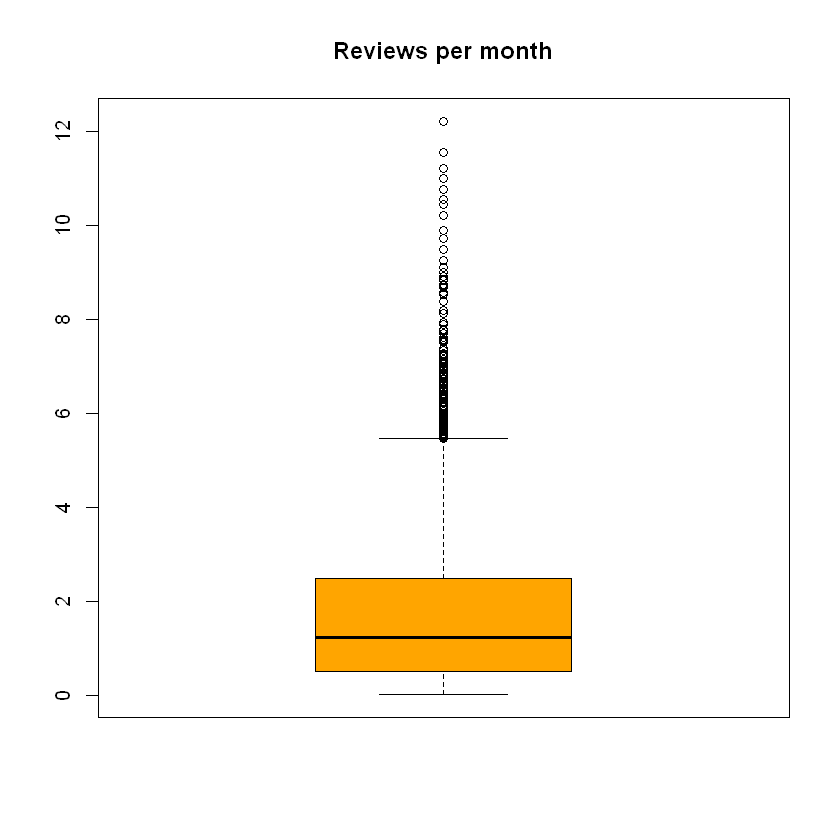

In [8]:
boxplot(sevilla$reviews_per_month, main = "Reviews per month", col = "orange")

Ao observar o boxplot concluímos que há bastantes outliers. No entanto, estes não descaracterizam os restantes dados da coluna pois ainda é bastante visível a caixa com os valores dos primeiros 3 quartis.

Serão observados agora os valores NA's para tomar uma decisão relativamente a eles.

In [9]:
sevilla[which(is.na(sevilla$reviews_per_month)),]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
66,Studio Reservaloen casa del Museo 4,3258098,Apartamentos Reservaloen,Casco Antiguo,Museo,37.39195,-6.000250,Entire home/apt,120,1,0,,NA,20,182,0,A/SE/000167
69,Studio Reservaloen Casa del Museo 6,3258098,Apartamentos Reservaloen,Casco Antiguo,Museo,37.39250,-5.998050,Entire home/apt,122,1,0,,NA,20,180,0,A/SE/000167
73,Apartment-Ensuite with Shower-Salvador Azul,3258098,Apartamentos Reservaloen,Casco Antiguo,Alfalfa,37.39133,-5.991100,Entire home/apt,124,1,0,,NA,20,183,0,A/SE/000126
118,Apartments Reservaloen Terrazas de la catedral 6,3258098,Apartamentos Reservaloen,Casco Antiguo,Arenal,37.38719,-5.995560,Entire home/apt,416,1,0,,NA,20,171,0,A/SE/000137
143,Charming apartment in Sevilla,4697283,Caridad,Casco Antiguo,San Gil,37.40109,-5.989670,Entire home/apt,80,2,0,,NA,3,314,0,A/SE/00091
169,Apartamento en el centro de Sevilla con garaje,4830830,Alejandro,Casco Antiguo,Feria,37.39661,-5.993990,Private room,59,2,0,,NA,3,0,0,RTA: A/SE/00051
171,Apartamento en Sevilla 2 dormitorios opcion garaje,4830830,Alejandro,Casco Antiguo,San Lorenzo,37.39839,-5.994360,Entire home/apt,120,2,0,,NA,3,0,0,A/SE/00051
178,BIG ROOM.TOWN CENTRE.ONLY LONG TERM,3067388,Miguel,Los Remedios,Los Remedios,37.37568,-6.001480,Private room,10,60,0,,NA,2,287,0,Codigo registro turistico: VTF/HU/01096
194,"4. OSUNA.(1Bedroom,1sofabed,WIFI)",4813585,Francisco,Casco Antiguo,San Gil,37.40170,-5.995010,Entire home/apt,80,2,0,,NA,23,226,0,A/SE/00094


Foram retornados alguns valores da head e da tail da base de dados, onde a coluna *reviews_per_month* é NA. Olhando para esses dados, observamos que, ao longo da linha, sempre que há NA's na variável, há 0 na coluna *number_of_reviews* e a coluna *last_review* não tem nenhuma informação, estando vazia.

Com isto, decidiu-se substituir os valores NA, que não iriam ser contabilizados no modelo, por 0 já que se substituíssemos pela média, os dados das outras colunas referidas não iriam bater certo com o valor da média nestes.

Procedeu-se ao comando seguinte para tornar estes casos em 0.

In [10]:
sevilla$reviews_per_month[which(is.na(sevilla$reviews_per_month))] = 0

Assim, foram substituídos esses dados tal como podemos verificar em seguida. (retornada uma tabela com nenhum registo, pois já não existem NA's).

In [11]:
sevilla[which(is.na(sevilla$reviews_per_month)),]

name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>


Tal como esperado, não foi retornada nenhuma linha.

Assim, a nossa base de dados ficou assim, após a substituição destes valores.

In [12]:
sevilla[sevilla$reviews_per_month,]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,168,2020-01-08,1.18,1,117,0,CTC-2018150852
1.1,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,168,2020-01-08,1.18,1,117,0,CTC-2018150852
1.2,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,168,2020-01-08,1.18,1,117,0,CTC-2018150852
1.3,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,168,2020-01-08,1.18,1,117,0,CTC-2018150852
3,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,503692,Margot,Casco Antiguo,San Bartolomé,37.38816,-5.98537,Private room,79,2,86,2022-06-06,0.64,6,360,11,H/SE/01244
1.4,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,168,2020-01-08,1.18,1,117,0,CTC-2018150852
2,BEAUTIFUL APARTMENT IN SEVILLE,224697,Walter,Casco Antiguo,San Lorenzo,37.39898,-5.99533,Entire home/apt,75,3,42,2020-02-17,0.30,1,241,0,VFT/SE/01116
2.1,BEAUTIFUL APARTMENT IN SEVILLE,224697,Walter,Casco Antiguo,San Lorenzo,37.39898,-5.99533,Entire home/apt,75,3,42,2020-02-17,0.30,1,241,0,VFT/SE/01116
2.2,BEAUTIFUL APARTMENT IN SEVILLE,224697,Walter,Casco Antiguo,San Lorenzo,37.39898,-5.99533,Entire home/apt,75,3,42,2020-02-17,0.30,1,241,0,VFT/SE/01116


Passemos agora para outra variável.

## Availability 365

Vamos verificar agora a variável *availability_365*, realizando o mesmo processo para a variável anterior. Vamos então começar por ver o boxplot.

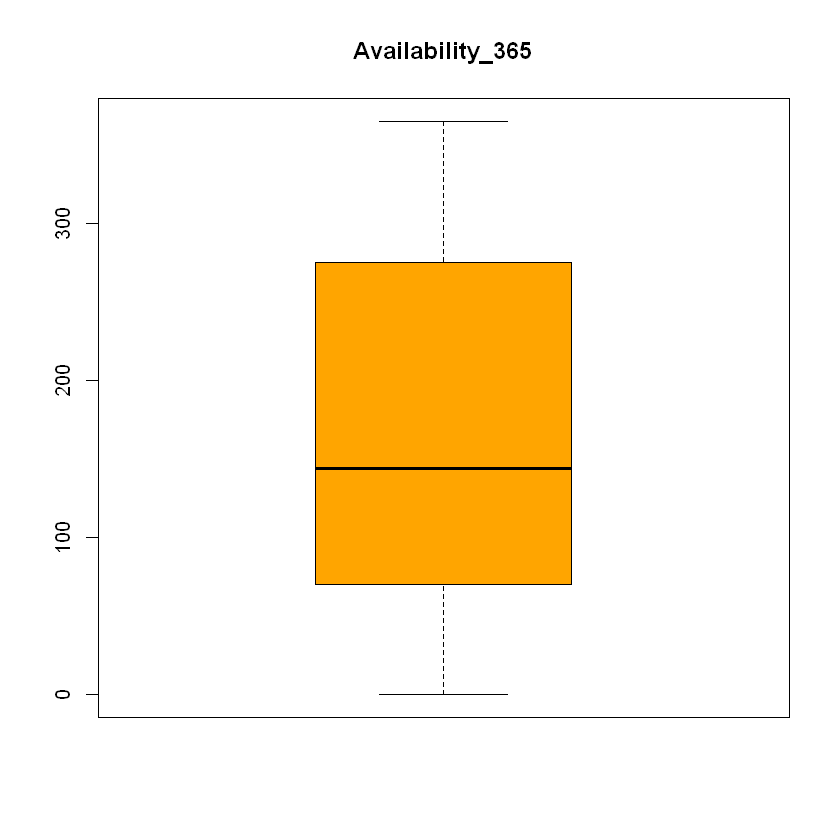

In [13]:
boxplot(sevilla$availability_365, main = "Availability_365", col = "orange")

Verificamos que no gráfico consruído acima não exitem a presença de ouliers, o que, no contexto da base de dados, possa fazer sentido visto que os dados irão variar entre os 365 dias do ano, mais ou menos.
No comando realizado abaixo, confirmamos a não existência de valores extremos na coluna em análise.

In [14]:
boxplot(sevilla$availability_365, plot=FALSE)$out

numeric(0)

No entanto, no summary realizado antes do estudo das variáveis separadamente, vemos que o valor mínimo é 0. Este dado ser 0 , pode fazer sentido devido ao facto de na reserva de um serviço do airbnb, o quarto não estar a receber hóspedes no momento e estar a ser utilizado para outros meios. Também é difícil julgar este dado porque não sabemos se o dado estará coerente ou não com a realidade. Veremos, mesmo assim, em quais linhas existem valores nulos nesta variável.

In [15]:
sevilla[which(sevilla$availability_365==0),]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
24,Penthouse with¡Large Private Terrac¡Wifi.Triana-Se,1848992,Jose,Triana,Triana Casco Antiguo,37.38693,-6.00382,Entire home/apt,37,3,330,2020-07-26,2.59,1,0,0,VFT/SE/00993
57,"Azul, Nice apart. Historic center",2901559,Fernando,Casco Antiguo,San Vicente,37.39576,-5.99737,Entire home/apt,49,2,194,2020-03-08,1.58,2,0,0,VFT/SE/00328
59,Contemporary Loft Space in Historic City Center,3121992,María Victoria,Casco Antiguo,"Encarnación, Regina",37.39510,-5.99294,Entire home/apt,89,3,219,2022-08-31,1.91,2,0,30,VFT/SE/00327
60,MINI LOFT COOL NEIGHBORHOOD CENTER,1198187,Oscar,Casco Antiguo,San Gil,37.40125,-5.99025,Entire home/apt,30,4,801,2022-09-09,6.51,1,0,4,VFT/SE/00585
119,Ático muy céntrico GASTOS INCLUIDOS,4286278,Francisco,Casco Antiguo,Feria,37.39692,-5.99132,Entire home/apt,60,2,150,2021-06-29,1.30,1,0,0,VFT/SE/02279
145,Central 3b Penthouse with Terrace. VFT/SE/00722,2584848,Jose Manuel,Casco Antiguo,San Bartolomé,37.39019,-5.98516,Entire home/apt,181,2,103,2020-01-02,0.89,3,0,0,VFT/SE/00722
169,Apartamento en el centro de Sevilla con garaje,4830830,Alejandro,Casco Antiguo,Feria,37.39661,-5.99399,Private room,59,2,0,,0.00,3,0,0,RTA: A/SE/00051
171,Apartamento en Sevilla 2 dormitorios opcion garaje,4830830,Alejandro,Casco Antiguo,San Lorenzo,37.39839,-5.99436,Entire home/apt,120,2,0,,0.00,3,0,0,A/SE/00051
226,DUPLEX IN XVII CENTURY PALACE,5730934,Jose María,Casco Antiguo,"Encarnación, Regina",37.39382,-5.98921,Entire home/apt,190,2,345,2020-03-15,3.04,1,0,0,VFT/SE/01387


Nas linhas representadas, pelas razões descritas acima, decidimos não alterar os nulos desta variável.

## Number_of_reviews_ltm

Veremos agora o number_of_reviews_ltm (número de reviews nos últimos doze meses).

Tal como nas variáveis anteriores será feito um boxplot.

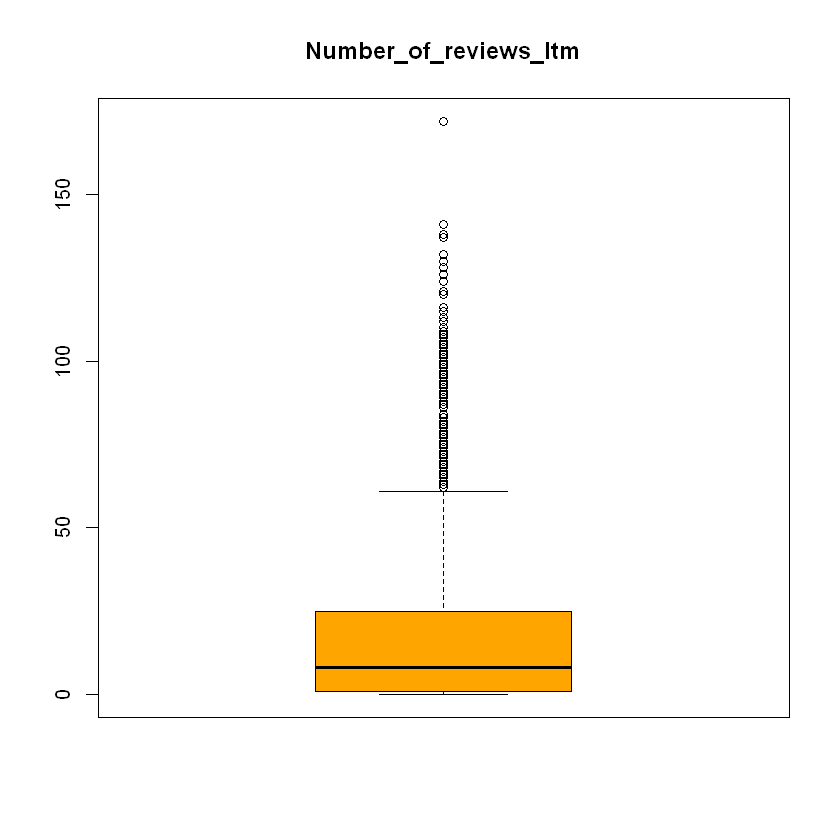

In [16]:
boxplot(sevilla$number_of_reviews_ltm, main = "Number_of_reviews_ltm", col = "orange")

O boxplot dá-nos uma boa dispersão com alguns outliers, porém não são muito impactantes, visto que em outras variáveis como o *reviews_per_month*, existem também valores de reviews bastante elevadas relativamente a outros.

Ainda, se pensarmos no contexto da nossa base de dados, é normal existirem mais airbnb's com um número de reviews menor (primeiros 3 quartis) para apartamentos/casas recentes no site, mas ao mesmo tempo também existirem valores de reviews elevados para apartamentos que já foram colocados há mais tempo.

## Price

Agora, iremos nos focar na nossa variável target escolhida, o *price*, para verificar se todos os valores fazem sentido e, se não fizerem, o que poderá ser realizado para reverter isso. Comecemos por fazer novamente o boxplot.

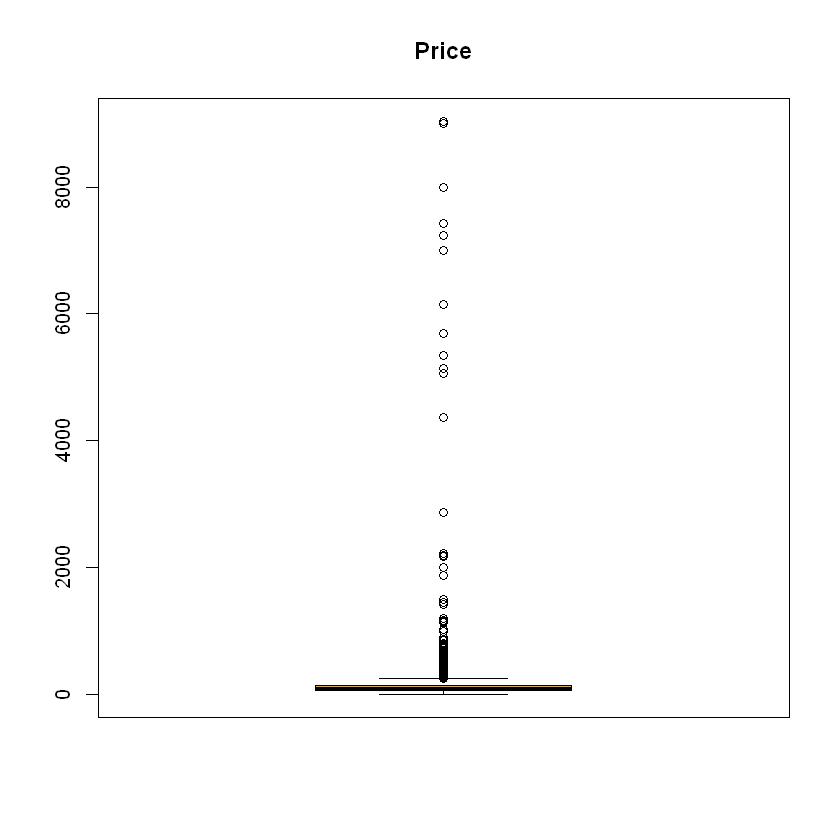

In [17]:
boxplot(sevilla$price, main = "Price", col = "orange")

Visualizando o gráfico vemos que a dispersão foi enorme, existindo outliers tão severos, capzes de contrair a escala da caixa dos 3 quartis. Assim, teremos de estudar os outliers do preço e ver o que pode ser feito em relação a isto.

In [18]:
outliers_price <- boxplot(sevilla$price, plot=FALSE)$out
# outliers_price # se quisermos printar os valores guardados em (outliers_price)
cat("Foram detetados", length(outliers_price),"outliers na variável preço.")

Foram detetados 475 outliers na variável preço.

Tal como a linha de cima retornou, foram detetados 475 outliers, onde muitos deles são severos. No entanto, só temos os valores guardados no vetor *outlier_price* como um dado "solto" e interessa-nos saber se podemos aceitar os outliers como casos atípicos para a reserva de um airbnb ou se teremos de tomar alguma medida.

Assim, vamos ver as linhas onde há outliers no preço e ordenar para termos uma head e tail dos registos

In [19]:
z <- sevilla[which(sevilla$price %in% outliers_price | sevilla$price==0),]
z[order(z$price),]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
3978,Magnifico hotel situado en el centro de la ciudad,356540497,Hotel,Casco Antiguo,Alfalfa,37.39109,-5.992530,Hotel room,0,1,0,,0.00,1,0,0,
3869,Superior triple estándar en Hotel Cetina Sevilla,350634437,Carmen,Casco Antiguo,Alfalfa,37.39019,-5.993280,Private room,261,1,0,,0.00,28,234,0,I-0055/2020
5553,Menéndez Pelayo Sevilla Urban con parking,301473052,Esther,Nervión,La Florida,37.38628,-5.984240,Entire home/apt,261,1,15,2022-09-06,2.54,25,68,15,FT/SE/04943
571,Una casa histórica con mucho colorido y terraza,31889277,Ruben,Casco Antiguo,Feria,37.39815,-5.991650,Entire home/apt,262,1,177,2022-07-31,2.02,2,283,24,VFT/SE/00399
3879,Habitación executive individual estándar en Hotel Cetina Sevilla,350634437,Carmen,Casco Antiguo,Alfalfa,37.39212,-5.992970,Private room,262,1,0,,0.00,28,186,0,I-0055/2020
3967,Apartment with Private Patio,256199722,Olga,Casco Antiguo,"Encarnación, Regina",37.39324,-5.993929,Entire home/apt,262,1,16,2022-08-30,1.05,7,179,9,A/SE/00272
5165,Apartamento LP RENTAL HOME MAGDALENA,433444976,LP Investments 2017,Casco Antiguo,Museo,37.39155,-5.998100,Entire home/apt,262,1,36,2022-09-18,5.51,1,234,36,VTF/SE/07863
1485,"Alonso Terrace. 4 bedrooms, terrace, centre",89331773,Veoapartment,Casco Antiguo,Alfalfa,37.39131,-5.991490,Entire home/apt,263,1,79,2022-09-19,1.30,36,322,25,VFT/SE/03049
4381,Moderno apartamento a 1 minuto de la Catedral,262955031,Welldone,Casco Antiguo,Santa Cruz,37.38588,-5.993780,Private room,263,1,0,,0.00,7,290,0,A/SE/00213


Nos 30 registos com os outliers mais pequenos (head) podemos observar que na 1ª linha há um valor 0 no preço, que é algo impossível, mas também que existem, nessa mesma linha, diversos campos com valores 0. Quanto a esta situação, decidimos retirar a linha da base de dados, mas mantendo a base de dados original na variável sevilla. Ou seja, foi criada a variável **sevilla1** com a base de dados sem essa linha (linha 3978).

In [20]:
sevilla[3978,] # mostrar a linha a apagar

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
3978,Magnifico hotel situado en el centro de la ciudad,356540497,Hotel,Casco Antiguo,Alfalfa,37.39109,-5.99253,Hotel room,0,1,0,,0,1,0,0,


Em seguida, fomos observar as últimas 30 linhas do output (tail) e detetamos imediatamente que são outliers severos e que, provavelmente, não muito reais para pôr num anúncio do airbnb. Porém, só se fôssemos verificar cada linha separadamente para ver quais destes valores não se aproximariam com a realidade. Por isso, decidimos deixar estes outliers severos, mas que iríamos logaritmizar esta variável com o intuito de reduzir a escala, não descaracterizando os valores do preço.

In [21]:
sevilla1 <-sevilla[-3978, ]
sevilla1$log_price <- log(sevilla1$price)

Após logaritmizar os valores, iremos fazer um boxplot da nova coluna para ver se houve alteração da dispersão.

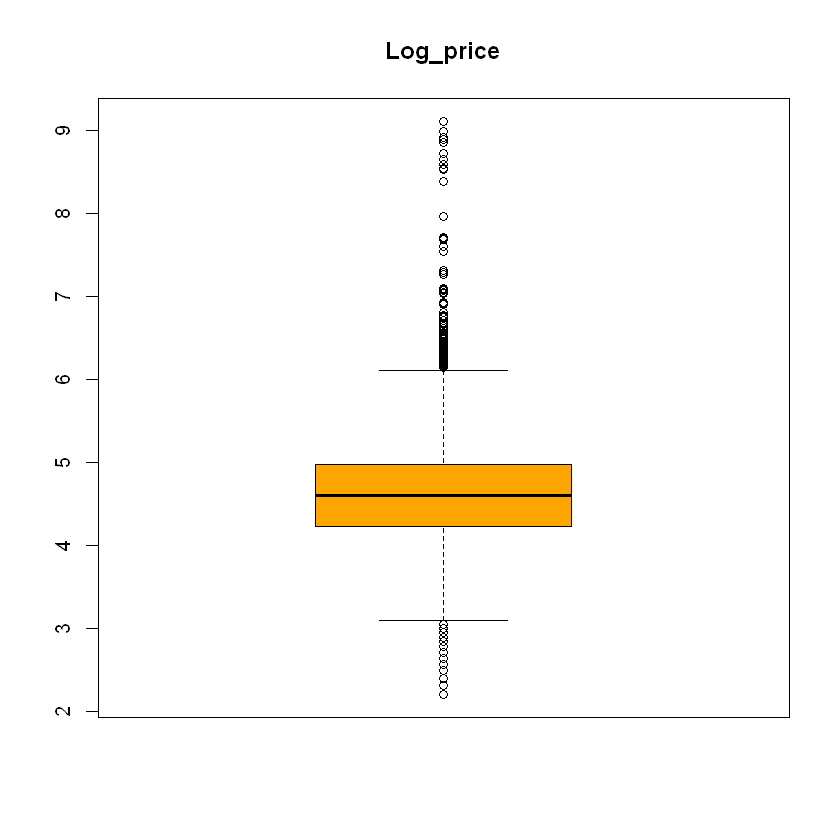

In [22]:
boxplot(sevilla1$log_price, main = "Log_price", col = "orange")

## Minimum_nights

Faremos o mesmo processo que para as outras variáveis, mas para *minimum_nights*. Vai ser desenhado o boxplot da variável.

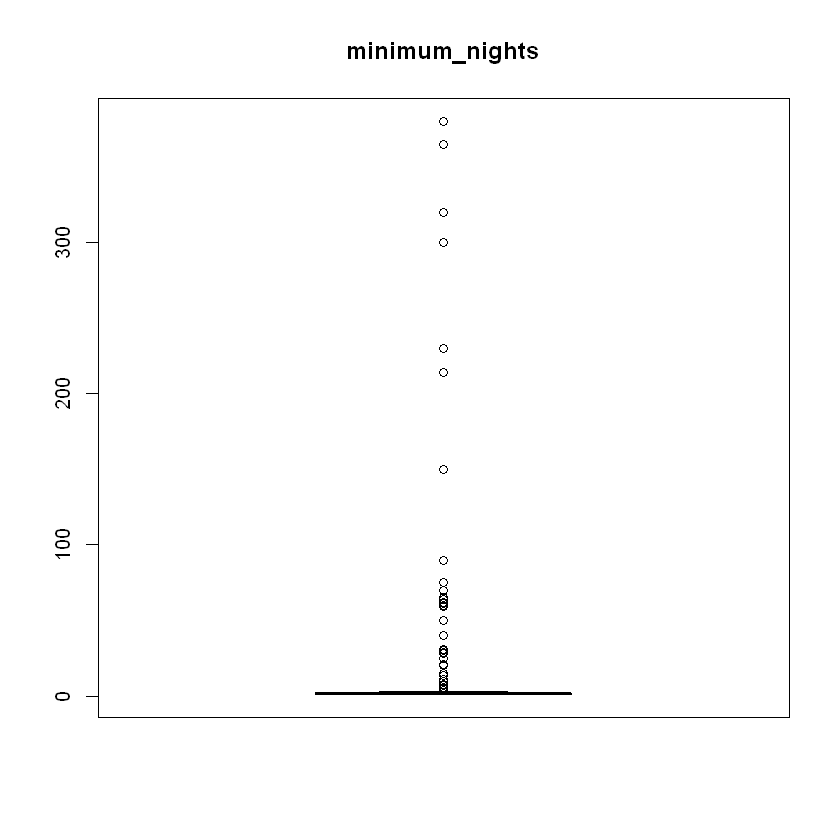

In [23]:
boxplot(sevilla1$minimum_nights, main="minimum_nights",col="orange")

Tal como na variável *price*, estudada anteriormente, é possível identificar uma grande dispersão dos outliers, pelo que a caixa quase não se torna visível. Dado o contexto do problema é perceptível haver um mínimo de noites muito baixo, pois é o mais comum quando se aluga um airbnb para um curto período de tempo. Observemos então estes outliers a fim de extrair mais informação sobre a variável em estudo.

In [24]:
outliers_min_nights <- boxplot(sevilla1$minimum_nights, plot=FALSE)$out
outliers_min_nights
cat("Valor mínimo dos outliers da variável minimum_nights:",min(outliers_min_nights),sep="\n",
    "Valor máximo dos outliers da variável minimum_nights:",max(outliers_min_nights))

[1]  64  14  14  15  28   7   4  60   4   4  60   4   7  60   5  60 380   4
 [19]  61   4   4  60   5  60   5   7   5   7   6  60   5 365   6  60   5  30
 [37]   5  28  61  61  61  61  61   4   4  11   7   5   5   7   5  90 365   5
 [55]  90   4   4   4   5   5   7   5   5  28  61   6  30   5   5   4  60  28
 [73] 365   4  10  20   4   5   5  61   5   4   5   4   5   5  60   5   6   6
 [91]  60  60   4   5  61  65  65  64  75   5  30  60   4   4   4   5   4 320
[109]   4   7  60   4  60   4   4   5  30   4  60  61 365   4  60  70   5  60
[127]   5   6  60   4   5   4   4   6   4  25  61  60  60  60  60  28  61  61
[145]  61  61   4   4   4  61  28  28  40   4  60   4  30   6  60  61   4   5
[163]  60   4  60   4   7   5   7  61   4   5   5   4  30  10  10   4   4   4
[181]  60  60  60  60  60   7   6   4   4  60  10 300  30   4   4  61   4   4
[199]  60  28   6  60   4   4   5  60  60  60   5   6   4   4   4  60   7   4
[217]  60  60   4  60  15  90   4   5  30   7   6  25  60   4  60  60  10  90
[235]  60  31  31   7   5   6  60   4   4   4   4   4   4   4   4   4  60  60
[253]   4   4   4   4   4   4   4   5  59  60  60  10   6  61   4  60 365   5
[271]  60   5  25  60   7  60  20   4 365   5   5  60   4  50   5  61  30   5
[289]   4   5 230   4   4   4  60   7   7  60  60   4   5   6  60  28   4  60
[307]  60  60   4   4  90  60  28  60   5  14   5   5   5   5   5   5   5   5
[325] 150 150 150   5   4   7  28  61   7   5   7   7  61  60  60   4   4   7
[343]   5  30   5   4  10   5   4   5  62   7  60   5   5   5   5  60   7 214
[361]   4   7  20   4   4  20   4  60  31  31   4  60   5  60  60   5  60   5
[379]   4   5  60   7   6   6   4  75   4   4  60  60   7  60   5   4   4   8
[397]   6  30  60  21   7   4  30   4   5   4  60   4  60  60  50  29  30   4
[415]   4   4   4   4  62  62  62  60   7  60  61   4   4   4  30  60  62  60
[433]  30

Valor mínimo dos outliers da variável minimum_nights:
4
Valor máximo dos outliers da variável minimum_nights:
380


Ao observar por alto a lista dos outliers, verificamos que existem muitos valores de 4 a 7, 30's ou 60's. Este fator até pode fazer sentido porque significa que o airbnb terá período mínimo de poucos dias ou de 1 a 2 meses, pelo que não precisará de ser alterado.

No entanto, ao ver os extremos **min** e **max** da variável criada, *outliers_min_nights*, concluímos que o valor máximo poderá não bater certo com os dados, pois um valor de 380 dias é demasiado elevado, obrigando a uma estadia mínima de mais de um ano.

A fim de investigar sobre isso, veremos as linhas completas onde estes outliers severos superiores estão presentes, para descobrir alguma imprecisão.

In [25]:
x <- sevilla1[which(sevilla1$minimum_nights %in% outliers_min_nights),]
tail(x[order(x$minimum_nights),])

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,log_price
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
570,Appartment Seville 3 rooms 6 person,37247128,Mario,San Pablo - Santa Justa,Arbol Gordo,37.40138,-5.97113,Entire home/apt,80,365,0,,0.00,1,365,0,,4.382027
706,PENTHOUSE WITH FANTASTIC PRIVATE TERRACE ****,52382050,Santiago,Casco Antiguo,Feria,37.39839,-5.98863,Entire home/apt,249,365,82,2020-03-10,1.04,1,291,0,VFT/SE/00505,5.517453
1081,"Duplex de lujo en casco antiguo de Sevilla, Wifi",98803844,Lupe,Casco Antiguo,Santa Catalina,37.39356,-5.98687,Entire home/apt,60,365,62,2019-11-05,0.87,1,365,0,VTF/SE/01539,4.094345
3165,Disponible para septiembre un lugar acogedor l,218648377,Elsa,Casco Antiguo,"Encarnación, Regina",37.39279,-5.98981,Private room,400,365,0,,0.00,1,365,0,,5.991465
3286,Diseñó Triana,136150215,Francisco,Triana,Triana Oeste,37.38908,-6.00948,Entire home/apt,86,365,1,2019-10-26,0.03,1,0,0,CTC-2019177075,4.454347
206,Blue Canary Room Parking & Spanish Lessons,909708,Adriano,Macarena,"Doctor Barraquer, G. Renfe, Policlínico",37.40747,-5.98655,Private room,45,380,232,2019-09-05,2.02,2,25,0,VFT/SE/01155,3.806662


Após observar atentamente os dados acima representados, vemos pode existir alguma coerência nestes outliers (severos superiores). Um exemplo disto é que a última review foi feita em 2019 ou 2020, para estes registos mostrados, ao que indica que pode haver pessoas a utilizar esses quartos no momento, visto que o período máximo é de cerca de um ano. Também, mesmo não mostrando grande coerência, podemos dizer que o número de reservas possa ser elevado em alguns casos, pois o quarto já foi para um minímo de noites menor ou há muitas reservas que não acontecem ou que são canceladas a meio da estadia.

O que nos levou a concluir tudo isto para não alterar nenhum valor desta variável foi o link seguinte (procurado pelo nome na base de dados), correspondente ao maior valor desta coluna: 380; se marcarmos uma data vemos o período de estadia mínima de 380 noites.

https://www.airbnb.pt/rooms/1017062?_set_bev_on_new_domain=1669485936_MjhlNjg2MzY4NmYx&source_impression_id=p3_1669485937_Ed%2FeGQfdidZIcDja&guests=1&adults=1#availability-calendar

Mesmo assim, decidimos logaritmizar a fim de tornar o intervalo de valores mais pequeno, não descarcterizando a variável.

In [26]:
sevilla1$log_minimum_nights <- log(sevilla1$minimum_nights)

Já com os valores logaritmizados, vamos desenhar um boxplot attravés da nova coluna da base de dados (log_minimum_nights).

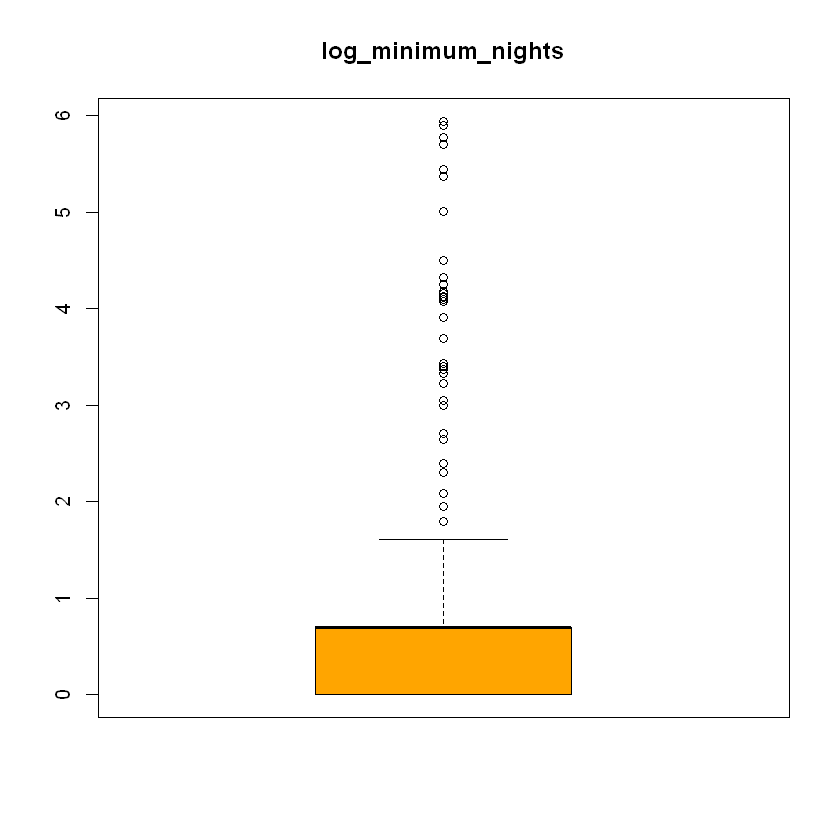

In [27]:
boxplot(sevilla1$log_minimum_nights, main="log_minimum_nights",col="orange")

## Number of reviews

Foi realizado o mesmo processo, onde se desenha o boxplot com a variável a estudar (*number_of_reviews*).

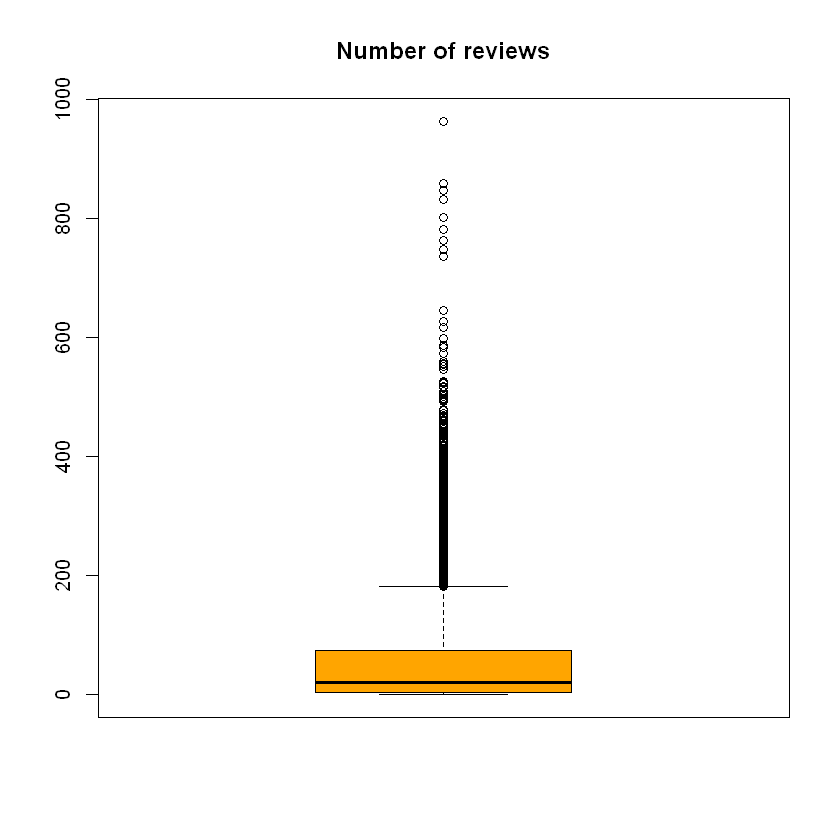

In [28]:
boxplot(sevilla1$number_of_reviews, main = "Number of reviews", col = "orange")

Verificamos que há bastantes outliers, mas que podem ser possíveis devido ao número de reviews que pode variar demasiado, dependendo do tempo em que o apartamento/casa está a ser utilizado para airbnb. 

Faremos novamente o reconhecimento dos outliers e, em seguida, vistos nas linhas da nossa base de dados.

In [29]:
outliers_number_reviews <- boxplot(sevilla1$number_of_reviews, plot=FALSE)$out

In [30]:
y <- sevilla1[which(sevilla1$number_of_reviews %in% outliers_number_reviews | sevilla1$number_of_reviews==0),]
y[order(y$number_of_reviews),]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,log_price,log_minimum_nights
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
66,Studio Reservaloen casa del Museo 4,3258098,Apartamentos Reservaloen,Casco Antiguo,Museo,37.39195,-6.000250,Entire home/apt,120,1,0,,0,20,182,0,A/SE/000167,4.787492,0.0000000
69,Studio Reservaloen Casa del Museo 6,3258098,Apartamentos Reservaloen,Casco Antiguo,Museo,37.39250,-5.998050,Entire home/apt,122,1,0,,0,20,180,0,A/SE/000167,4.804021,0.0000000
73,Apartment-Ensuite with Shower-Salvador Azul,3258098,Apartamentos Reservaloen,Casco Antiguo,Alfalfa,37.39133,-5.991100,Entire home/apt,124,1,0,,0,20,183,0,A/SE/000126,4.820282,0.0000000
118,Apartments Reservaloen Terrazas de la catedral 6,3258098,Apartamentos Reservaloen,Casco Antiguo,Arenal,37.38719,-5.995560,Entire home/apt,416,1,0,,0,20,171,0,A/SE/000137,6.030685,0.0000000
143,Charming apartment in Sevilla,4697283,Caridad,Casco Antiguo,San Gil,37.40109,-5.989670,Entire home/apt,80,2,0,,0,3,314,0,A/SE/00091,4.382027,0.6931472
169,Apartamento en el centro de Sevilla con garaje,4830830,Alejandro,Casco Antiguo,Feria,37.39661,-5.993990,Private room,59,2,0,,0,3,0,0,RTA: A/SE/00051,4.077537,0.6931472
171,Apartamento en Sevilla 2 dormitorios opcion garaje,4830830,Alejandro,Casco Antiguo,San Lorenzo,37.39839,-5.994360,Entire home/apt,120,2,0,,0,3,0,0,A/SE/00051,4.787492,0.6931472
178,BIG ROOM.TOWN CENTRE.ONLY LONG TERM,3067388,Miguel,Los Remedios,Los Remedios,37.37568,-6.001480,Private room,10,60,0,,0,2,287,0,Codigo registro turistico: VTF/HU/01096,2.302585,4.0943446
194,"4. OSUNA.(1Bedroom,1sofabed,WIFI)",4813585,Francisco,Casco Antiguo,San Gil,37.40170,-5.995010,Entire home/apt,80,2,0,,0,23,226,0,A/SE/00094,4.382027,0.6931472


Após visualizarmos os registos verificamos que os primeiros 30 têm valores 0 mas, que fazem sentido, pois não existe última review e as *reviews_per_month* são 0 também.

Já nos outliers superiores (30 valores com minimum_nights mais elevado), também é possível visualizar que os dados da última review são todos muito recentes e que o mínimo de noite é também baixo. Isto leva-nos a crer que há uma grande circulação de hóspedes a entrar e a sair do airbnb e, por isso, existir um grande número de reviews (+500 para todos estes últimos casos).

Assim, decidimos não mexer nestes dados e deixá-los como estão na base de dados.

## Room type

Apesar do room_type não ser uma variável numérica, decidimos acrescentar a esta parte de tratamento de variáveis, pois achámos que seria interessante criar uma nova coluna com esta variável como dummy, para esudá-la no conjunto dos 4 níveis/grupos (apartamento/casa, hotel, quarto privado e quarto partilhado).
Assim, utilizámos o comando abaixo para a criação da coluna.

In [31]:
sevilla1$dummy_room_type <- as.factor(sevilla1$room_type)
unique(sevilla1$dummy_room_type)

[1] Entire home/apt Private room    Hotel room      Shared room    
Levels: Entire home/apt Hotel room Private room Shared room

Como dito anteriormente, foram criados os 4 níveis e mostrados uttilizando a função unique do próprio R. 

**NOTA:** Esta é apenas uma passagem rápida por todas as variáveis númericas para detetar valores fora da normalidade, que poderão ser mudados na execução dos modelos, especialmente nos outliers ou para criação de colunas novas à base de dados.

Acabada as medidas descritivas e limpeza das variáveis para tentar uma correlação mais elevada das mesmas, comecemos a montar o modelo ótimo, começando a verificar as correlações.

#### AUXÍLIO PARA O RELATÓRIO, DE FORMA A MOSTRAR A DISPERSÃO DOS VALORES NAS VARIÁVEIS A ESTUDAR:

Decidimos incluir estes gráficos de forma a tornar mais visual o relatório, mesmo não alterando severamene as variáveis (apenas logaritmizando algumas e mudar uma quanidade de linhas).

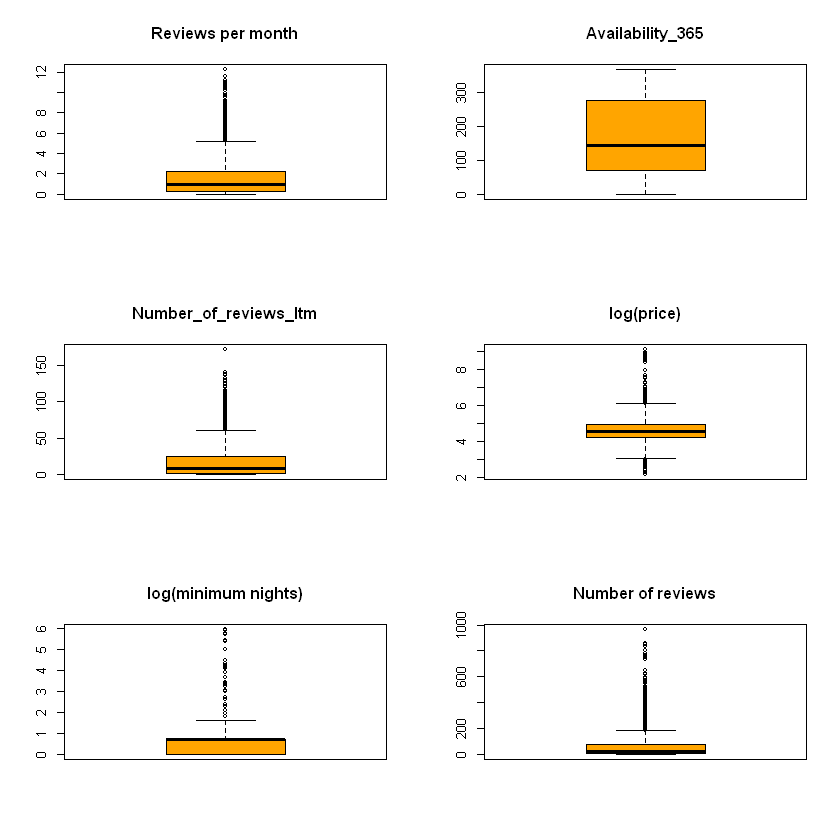

In [32]:
par(mfrow=c(3,2))
boxplot(sevilla1$reviews_per_month, main = "Reviews per month", col = "orange")
boxplot(sevilla1$availability_365, main = "Availability_365", col = "orange")
boxplot(sevilla1$number_of_reviews_ltm, main = "Number_of_reviews_ltm", col = "orange")
boxplot(sevilla1$log_price, main = "log(price)", col = "orange")
boxplot(sevilla1$log_minimum_nights, main="log(minimum nights)",col="orange")
boxplot(sevilla1$number_of_reviews, main = "Number of reviews", col = "orange")

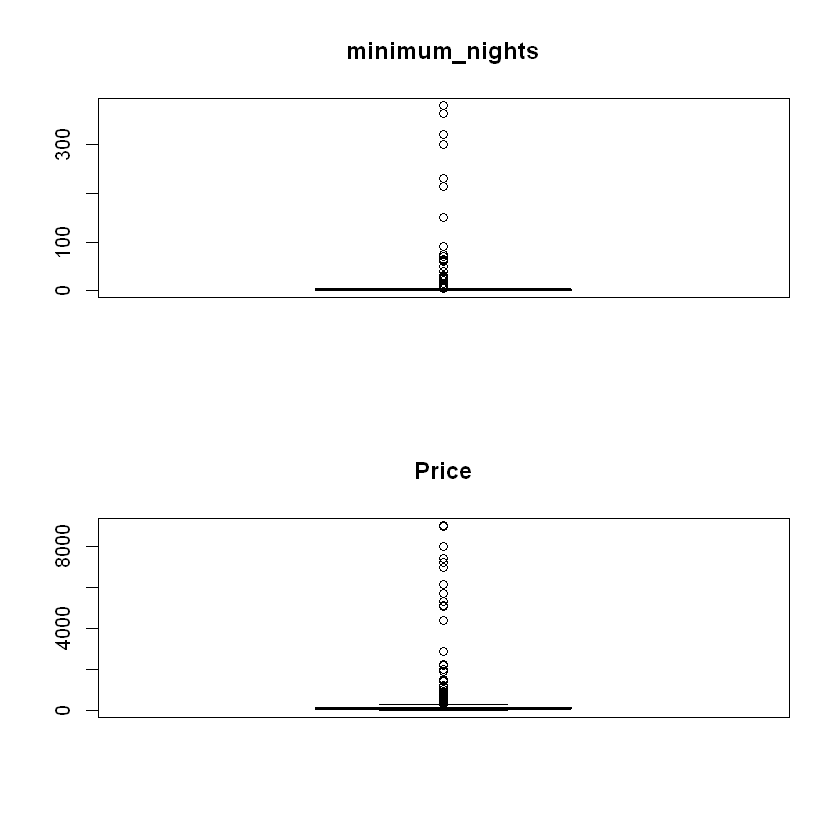

In [33]:
par(mfrow=c(2,1))
boxplot(sevilla1$minimum_nights, main="minimum_nights",col="orange")
boxplot(sevilla$price, main = "Price", col = "orange")

# Correlação entre as variáveis

Vamos começar a mexer com a relação entre variáveis, começando pela correlação entre as variáveis quantitativas, na forma de matriz. Em seguida, será desenhado um correlograma de modo a tornar mais visual esta correlação.

Ainda, será feita a correlação substituindo as variáveis do price e minimum_nights pelas mesmas variáveis logaritmizadas.

In [34]:
names(sevilla1)
corr1<- round(cor(sevilla1[c(6,7,9:11,13:16)]), digits = 2) # sem variáveis logaritmizadas
corr<- round(cor(sevilla1[c(6,7,11,13:16,18,19)]), digits = 2) # com variáveis logaritmizadas
corr1
corr

[1] "name"                           "host_id"                       
 [3] "host_name"                      "neighbourhood_group"           
 [5] "neighbourhood"                  "latitude"                      
 [7] "longitude"                      "room_type"                     
 [9] "price"                          "minimum_nights"                
[11] "number_of_reviews"              "last_review"                   
[13] "reviews_per_month"              "calculated_host_listings_count"
[15] "availability_365"               "number_of_reviews_ltm"         
[17] "license"                        "log_price"                     
[19] "log_minimum_nights"             "dummy_room_type"

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.00,0.08,-0.02,0.00,0.05,0.03,0.00,-0.06,0.03
longitude,0.08,1.00,0.00,0.06,0.00,-0.04,-0.04,0.02,-0.05
price,-0.02,0.00,1.00,0.05,-0.07,-0.09,0.04,0.03,-0.08
minimum_nights,0.00,0.06,0.05,1.00,-0.03,-0.08,-0.06,0.05,-0.09
number_of_reviews,0.05,0.00,-0.07,-0.03,1.00,0.64,-0.12,-0.08,0.67
reviews_per_month,0.03,-0.04,-0.09,-0.08,0.64,1.00,-0.07,-0.09,0.80
calculated_host_listings_count,0.00,-0.04,0.04,-0.06,-0.12,-0.07,1.00,0.05,-0.06
availability_365,-0.06,0.02,0.03,0.05,-0.08,-0.09,0.05,1.00,-0.07
number_of_reviews_ltm,0.03,-0.05,-0.08,-0.09,0.67,0.80,-0.06,-0.07,1.00


,latitude,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,log_price,log_minimum_nights
latitude,1.00,0.08,0.05,0.03,0.00,-0.06,0.03,-0.02,0.02
longitude,0.08,1.00,0.00,-0.04,-0.04,0.02,-0.05,-0.10,0.05
number_of_reviews,0.05,0.00,1.00,0.64,-0.12,-0.08,0.67,-0.18,0.02
reviews_per_month,0.03,-0.04,0.64,1.00,-0.07,-0.09,0.80,-0.19,-0.07
calculated_host_listings_count,0.00,-0.04,-0.12,-0.07,1.00,0.05,-0.06,0.18,-0.14
availability_365,-0.06,0.02,-0.08,-0.09,0.05,1.00,-0.07,0.11,-0.03
number_of_reviews_ltm,0.03,-0.05,0.67,0.80,-0.06,-0.07,1.00,-0.15,-0.06
log_price,-0.02,-0.10,-0.18,-0.19,0.18,0.11,-0.15,1.00,-0.21
log_minimum_nights,0.02,0.05,0.02,-0.07,-0.14,-0.03,-0.06,-0.21,1.00


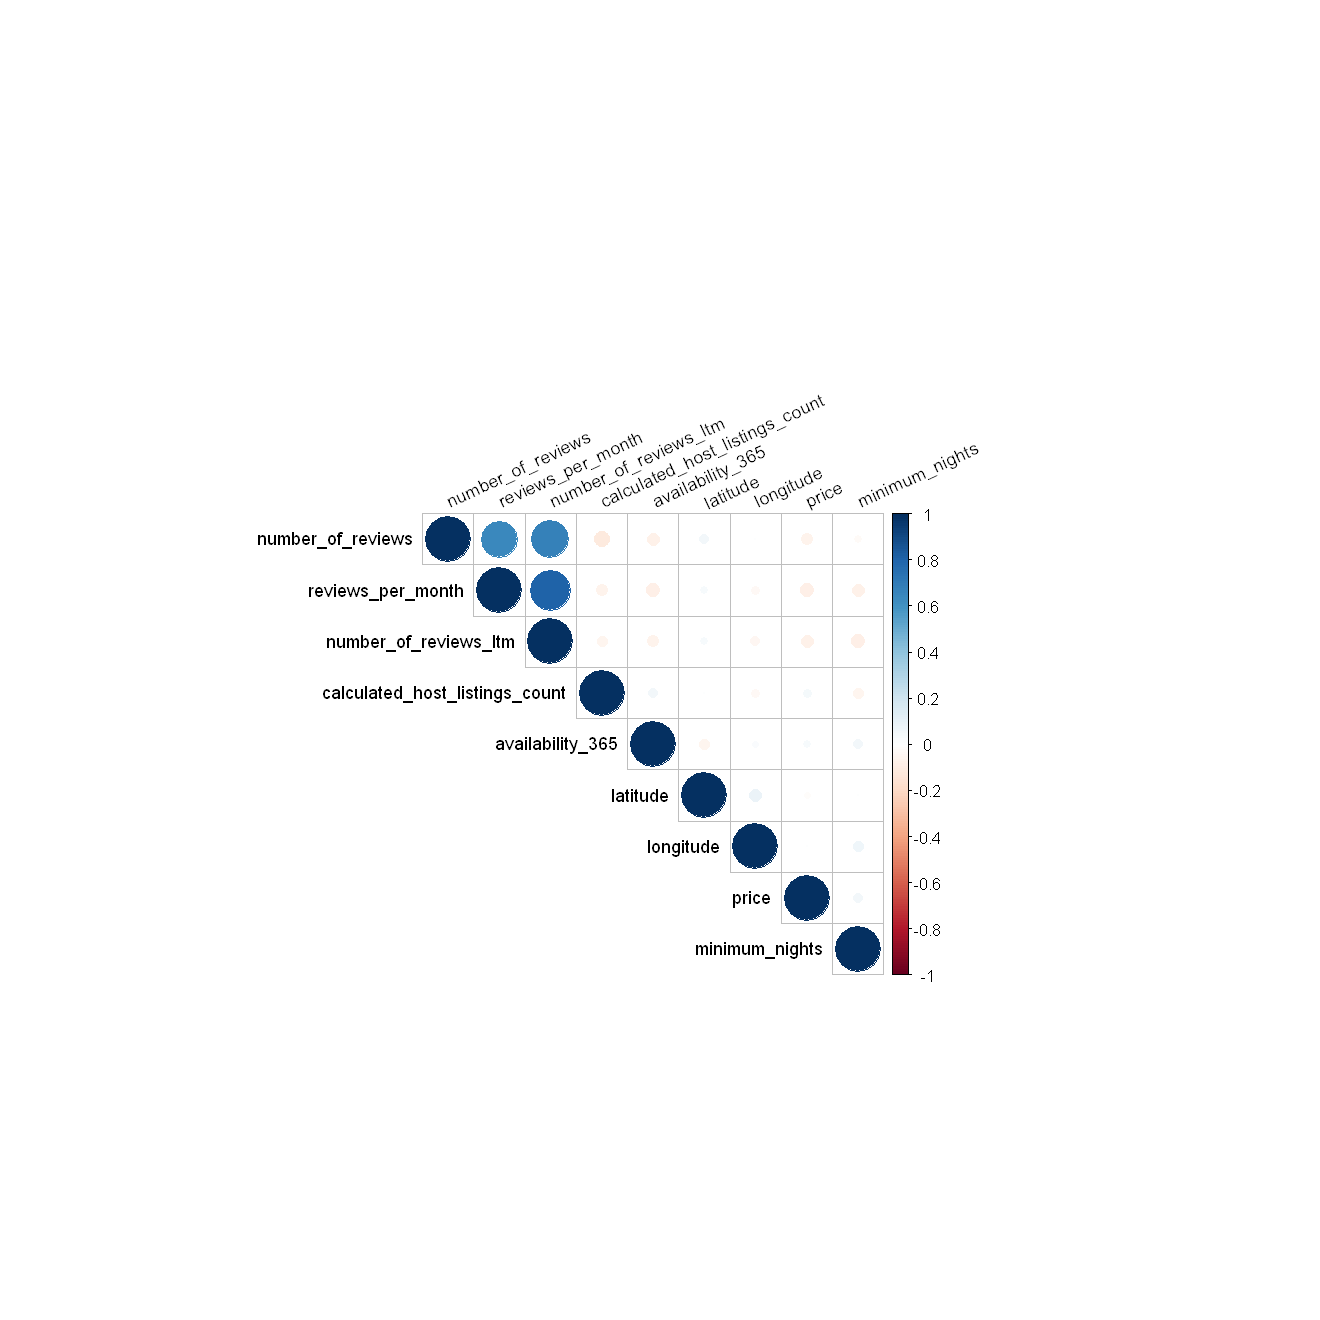

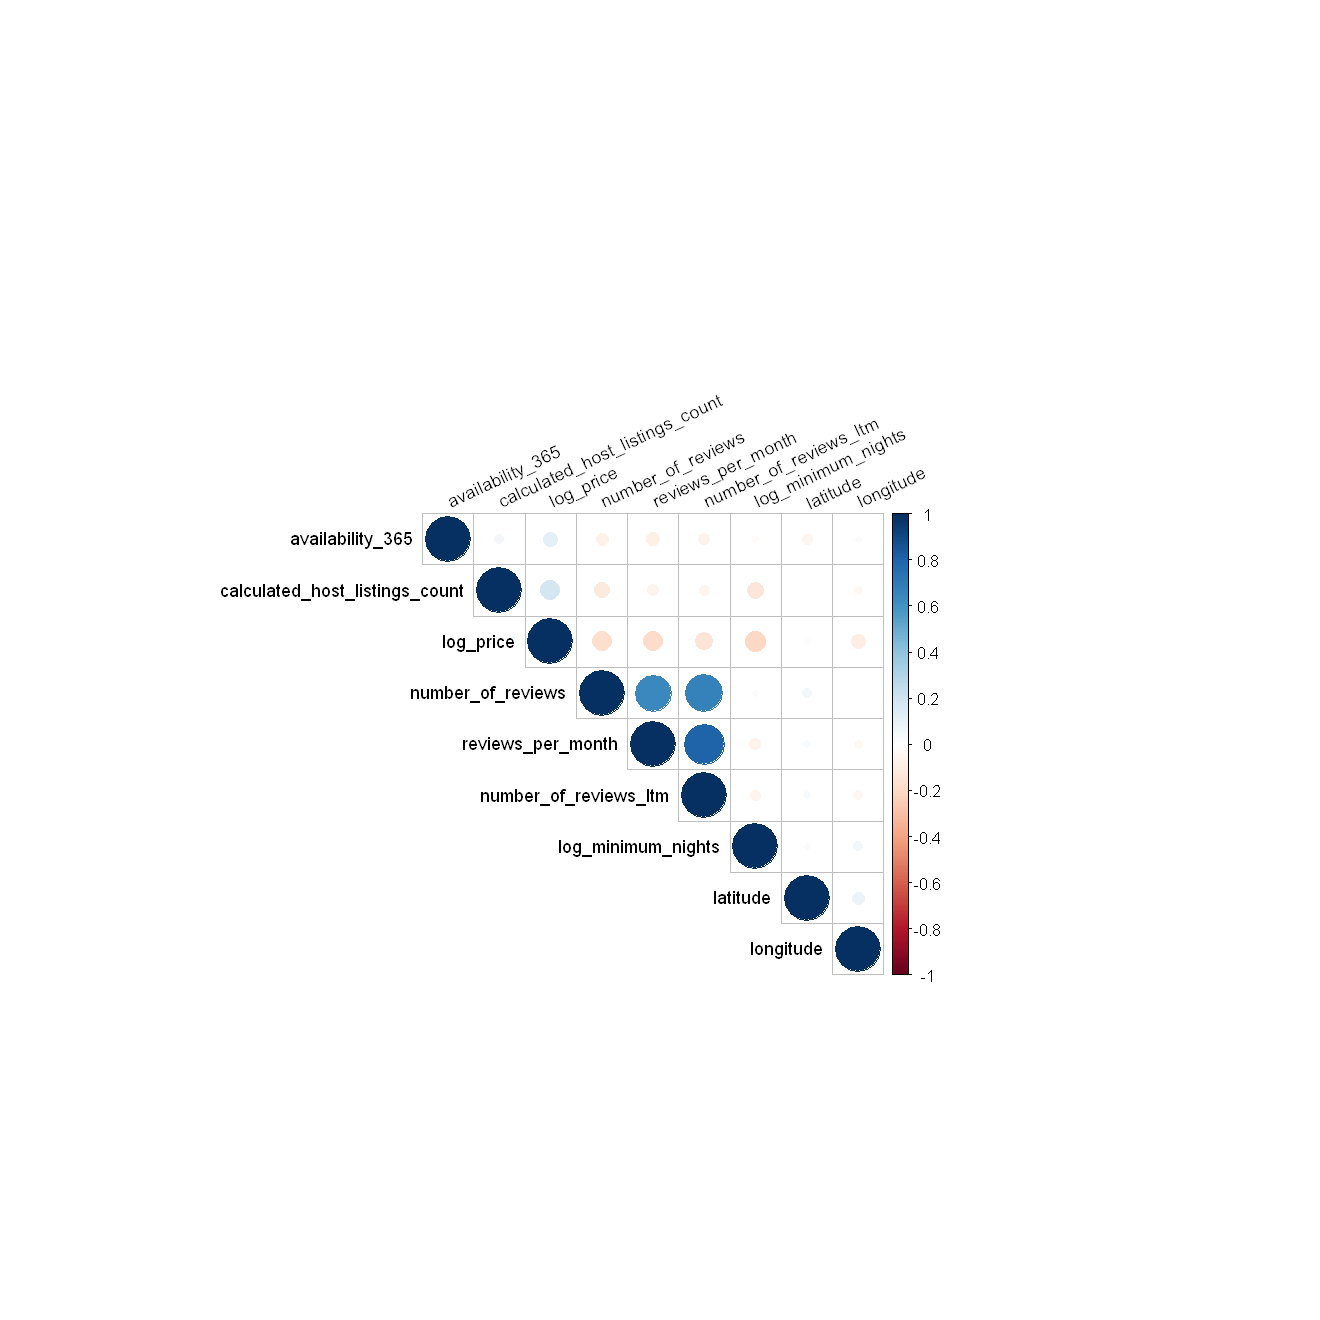

In [35]:
options(repr.plot.width=11, repr.plot.height=11)

corrplot(corr1, type = "upper", order = "hclust",tl.cex=0.9,
         tl.col = "black", tl.srt = 25)
corrplot(corr, type = "upper", order = "hclust",tl.cex=0.9,
         tl.col = "black", tl.srt = 25)

No relatório, será colocado o gráfico de correlação com as duas variáveis (price e minimum_nights) logaritmizadas, pois já tomámos a decisão de reduzir o intervalo de valores anteriormente. No entanto, na realização de modelos, serão outra vez tomados os valores iniciais, caso não seja necessário logaritmizar, complicando o modelo.

# Regressão linear múltipla e pressupostos dos resíduos

Para a realização de modelos, comecemos por fazer um modelo com as variáveis que achámos que estariam e seriam relacionadas com o preço, da variável original (sem estar logaritmizada). Assim, foi colocado o seguinte modelo, já com a variável dummy.

### Modelo 0 ou Baseline model

Designámos de modelo 0, um modelo experimental com todas as variáveis quantitativas originais do modelo + variável dummy de room_type, apenas para servir de ponto de partida para outros modelos mais avançados.

In [36]:
modelo <- lm(price ~ dummy_room_type + latitude + longitude + minimum_nights + number_of_reviews + reviews_per_month + calculated_host_listings_count + availability_365 + number_of_reviews_ltm, data = sevilla1)
summary(modelo)


Call:
lm(formula = price ~ dummy_room_type + latitude + longitude + 
    minimum_nights + number_of_reviews + reviews_per_month + 
    calculated_host_listings_count + availability_365 + number_of_reviews_ltm, 
    data = sevilla1)

Residuals:
   Min     1Q Median     3Q    Max 
-472.2  -74.3  -41.5    3.2 8857.2 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.287e+04  1.646e+04   1.389 0.164811    
dummy_room_typeHotel room       3.105e+02  5.332e+01   5.823 6.05e-09 ***
dummy_room_typePrivate room    -2.711e+01  1.232e+01  -2.200 0.027826 *  
dummy_room_typeShared room     -6.413e+01  8.578e+01  -0.748 0.454734    
latitude                       -5.944e+02  4.311e+02  -1.379 0.167985    
longitude                       8.072e+01  3.503e+02   0.230 0.817795    
minimum_nights                  9.154e-01  2.758e-01   3.319 0.000907 ***
number_of_reviews              -5.563e-02  6.597e-02  -0.843 0.399121    
re

Observando o output acima é possível verificar que o modelo não é muito representativo. Se observarmos o intercept, por exemplo, vemos que este passa no 0, o que não faz qualquer sentido para uma modelação de previsão do preço. Ainda, por cada unidade aumentada em cada uma das variáveis estimadas do modelo, verificamos que em todas, sem exceção, influenciam aproximadamente 0 na variável target, preço.  

In [37]:
vif(modelo)

,GVIF,Df,GVIF^(1/(2*Df))
dummy_room_type,1.077568,3,1.012529
latitude,1.021281,1,1.010584
longitude,1.058713,1,1.028938
minimum_nights,1.019609,1,1.009757
number_of_reviews,1.929758,1,1.389157
reviews_per_month,2.921810,1,1.709330
calculated_host_listings_count,1.037532,1,1.018593
availability_365,1.018124,1,1.009022
number_of_reviews_ltm,3.128907,1,1.768872


Agora, faremos um stepAIC com o intuito de verificar qual, à partida, será o melhor modelo para começar o nosso estudo.

In [38]:
stepAIC(modelo, direction="both")

Start:  AIC=76556.7
price ~ dummy_room_type + latitude + longitude + minimum_nights + 
    number_of_reviews + reviews_per_month + calculated_host_listings_count + 
    availability_365 + number_of_reviews_ltm

                                 Df Sum of Sq       RSS   AIC
- longitude                       1      6994 854001957 76555
- number_of_reviews_ltm           1     17093 854012055 76555
- number_of_reviews               1     93696 854088659 76555
- latitude                        1    250527 854245489 76557
<none>                                        853994962 76557
- availability_365                1    313860 854308822 76557
- calculated_host_listings_count  1    769718 854764680 76561
- reviews_per_month               1   1308588 855303550 76565
- minimum_nights                  1   1451934 855446896 76566
- dummy_room_type                 3   5322003 859316966 76591

Step:  AIC=76554.76
price ~ dummy_room_type + latitude + minimum_nights + number_of_reviews + 
    reviews


Call:
lm(formula = price ~ dummy_room_type + minimum_nights + reviews_per_month + 
    calculated_host_listings_count + availability_365, data = sevilla1)

Coefficients:
                   (Intercept)       dummy_room_typeHotel room  
                     157.68706                       310.23477  
   dummy_room_typePrivate room      dummy_room_typeShared room  
                     -25.49971                       -60.11206  
                minimum_nights               reviews_per_month  
                       0.91207                       -18.75459  
calculated_host_listings_count                availability_365  
                       0.45924                         0.06482  


Foi utilizado o melhor modelo feito pela função anterior (stepAIC) e foram logaritmizadas as variáveis já indicadas anteriormente, nas medidas descritivas/limpeza das variáveis. Também foi adicionada a variável dummy do room_type tal como no modelo anterior, mas primeiro testada separadamente.

### Modelo 1

O primeiro modelo a realizar será o que foi caracterizado, pelo último output, o melhor para as variáveis que queremos estudar. Neste modelo não foram realizadas nenhumas alterações e, por isso, o valor do $R^2$ não deverá ser muito mais elevado do que o feito anteriormente, pelo que podemos caracterizá-lo como um modelo inicial.

In [39]:
modl1 = lm(formula = price ~ dummy_room_type + minimum_nights + reviews_per_month + 
    calculated_host_listings_count + availability_365, data = sevilla1)
summary(modl1)


Call:
lm(formula = price ~ dummy_room_type + minimum_nights + reviews_per_month + 
    calculated_host_listings_count + availability_365, data = sevilla1)

Residuals:
   Min     1Q Median     3Q    Max 
-460.5  -74.8  -42.7    2.8 8889.9 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    157.68706    9.98307  15.795  < 2e-16 ***
dummy_room_typeHotel room      310.23477   53.30824   5.820 6.18e-09 ***
dummy_room_typePrivate room    -25.49971   12.03139  -2.119 0.034092 *  
dummy_room_typeShared room     -60.11206   85.72961  -0.701 0.483215    
minimum_nights                   0.91207    0.27508   3.316 0.000919 ***
reviews_per_month              -18.75459    2.85059  -6.579 5.10e-11 ***
calculated_host_listings_count   0.45924    0.18299   2.510 0.012109 *  
availability_365                 0.06482    0.03914   1.656 0.097752 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard er

Ao observarmos o modelo, verificamos que os

Veremos agora se, para o modelo em questão, são respeitados os pressupostos dos resíduos.

In [40]:
mean(modl1$residuals)
bptest(modl1)
bgtest(modl1)
jarque.bera.test(modl1$residuals)

[1] 2.818637e-14


	studentized Breusch-Pagan test

data:  modl1
BP = 61.459, df = 7, p-value = 7.712e-11



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl1
LM test = 366.3, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl1$residuals
X-squared = 28169627, df = 2, p-value < 2.2e-16


1º pressuposto: $H_0$-> a média dos resíduos é zero; $E(\epsilon)=0$. É verificado uma vez que a média dos resíduos é muito baixa, aproximando-se muito de zero.

2º pressuposto: $H_0$-> variância constante; $Var({\epsilon}_i)={\sigma}^2_\epsilon = {\sigma}^2$. Como o p-value é praticamente 0 e é inferior a 0.05, tomando 5% como nível de significância, rejeitamos a hipótese nula, então a variância não é constante. O gráfico assim deve apresentar uma estrutura em funil, pois há uma violação da homocedasticidade da variância no modelo em questão.

3º pressuposto: $H_0$-> ausência de autocorrelação; $Cov({\epsilon}_i,{\epsilon}_j)= 0, ({i \neq j})$. O p-value é inferior a 0.05, logo, rejeita-se a hipótese nula, significando que os resíduos estão autocorrelacionados.

4º pressuposto: $H_0$-> distribuição de probabilidades $\epsilon$ é normal; $\epsilon \approx N(0,\sigma)$. O 4º pressuposto, relativo ao teste de Jarque-Bera, também não é verificado, uma vez que o p-value é inferior a 0.05, que obriga à rejeição da hipótese nula. Assim, os resíduos não têm distribuição normal.  

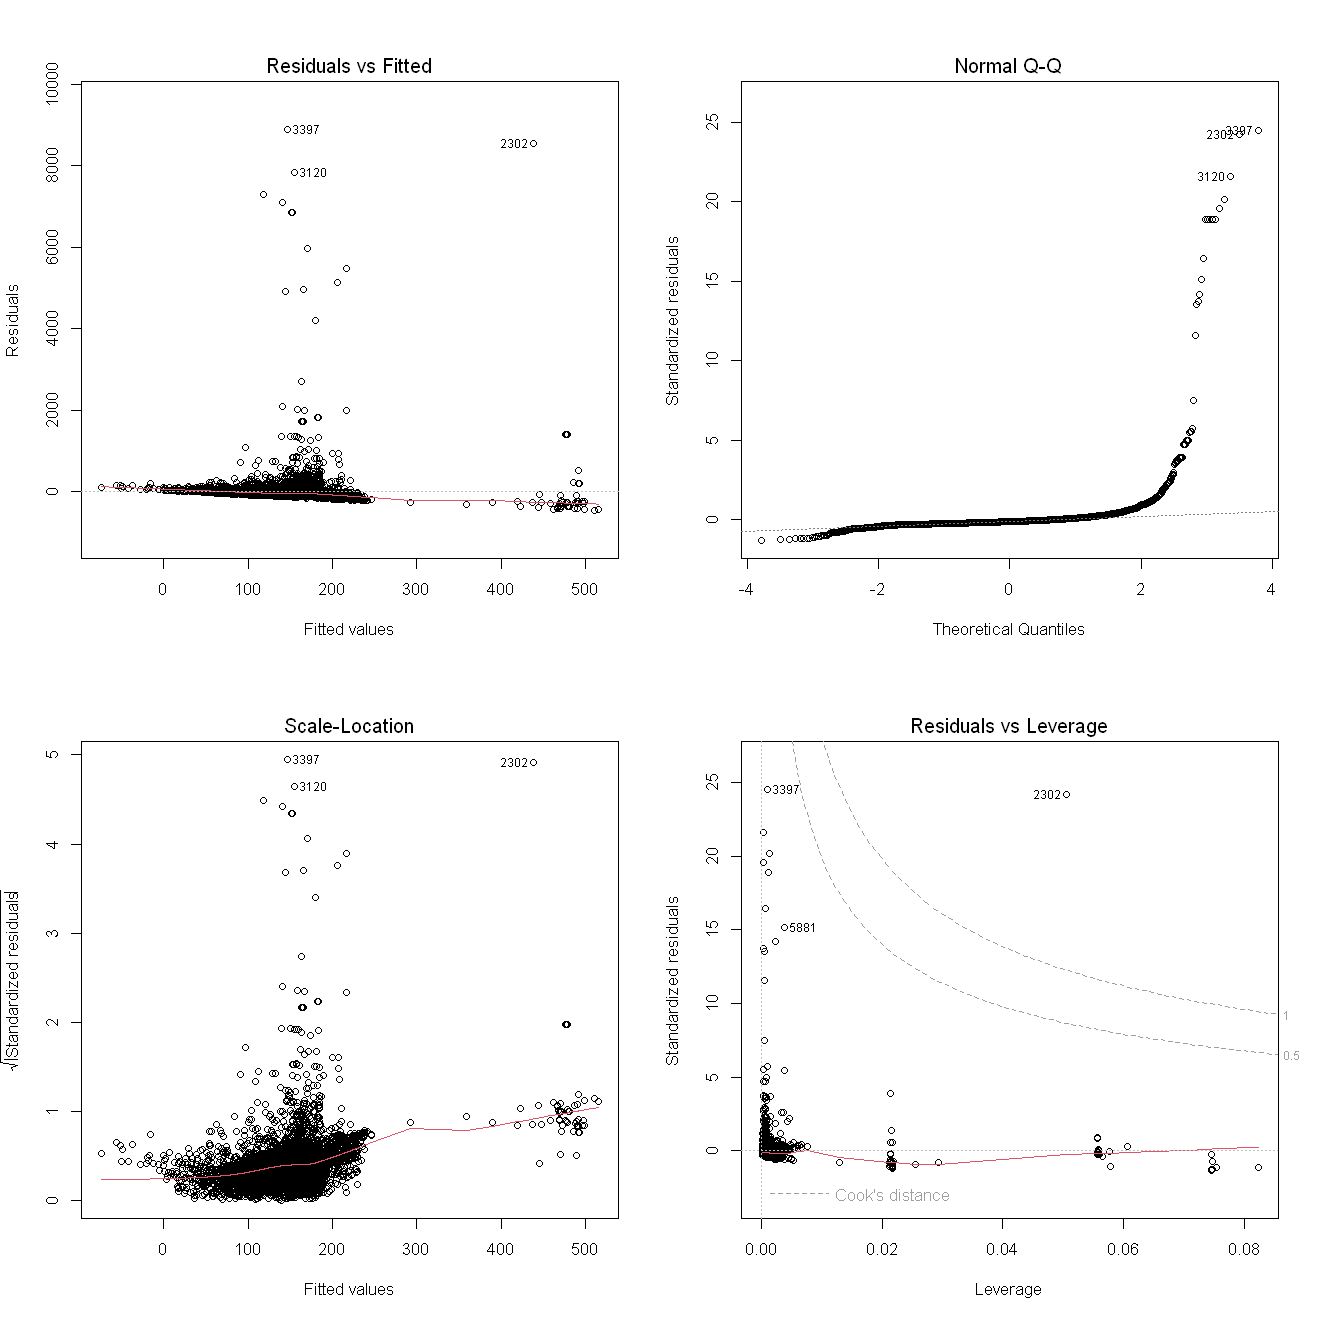

In [41]:
# gráficos associados com os resíduos da regressão
par(mfrow=c(2,2)) 
plot(modl1)

Ao observar os gráficos associados aos resíduos da regressão, verificamos a presença de bastantes outliers, identificados pela distância de Cook e pela não presença de uma distribuição normal.

Faremos agora um outlierTest para possivelmente remover estes outliers, pois eles podem estar a influenciar negativamente o modelo, prejudicando a previsão. Ao retirar estes valores não estamos a apagar a base de dados em si, mas sim a transformar numa nova variável, tal como feito nas medidas descritivas da variável do preço.

In [42]:
outlierTest(modl1)

     rstudent unadjusted p-value Bonferroni p
3397 25.72188        5.1365e-139  3.3351e-135
2302 25.37871        1.4980e-135  9.7264e-132
3120 22.43771        1.9052e-107  1.2370e-103
3567 20.81219         3.5342e-93   2.2948e-89
2463 20.17184         8.1859e-88   5.3151e-84
3659 19.41879         1.0801e-81   7.0132e-78
3657 19.41387         1.1825e-81   7.6781e-78
3658 19.41387         1.1825e-81   7.6781e-78
3660 19.41387         1.1825e-81   7.6781e-78
3661 19.41387         1.1825e-81   7.6781e-78

Graficamente, estes valores estão a influenciar o modelo tal como é visível no output abaixo.

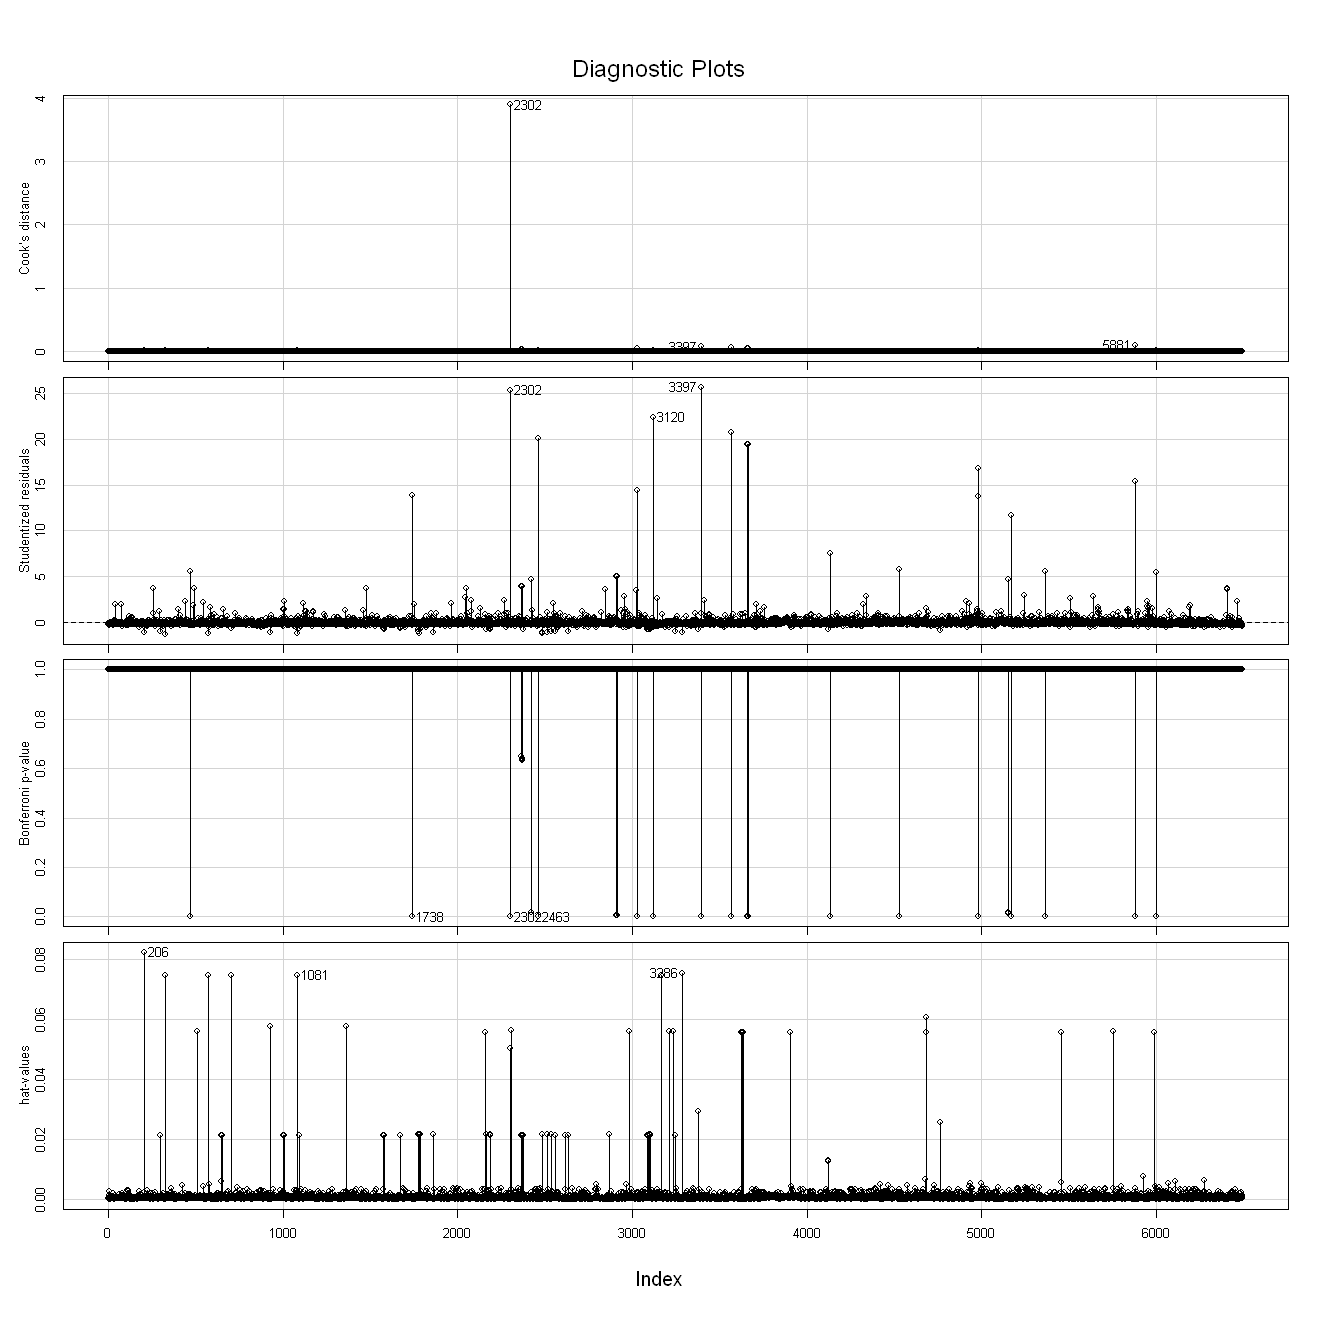

In [43]:
influenceIndexPlot(modl1, id=list(n=3))

### Modelo 2 - diminuição do dataset sevilla1

Será criada uma nova variável **sevilla2**, onde serão retirados os outliers da variável preço.

In [44]:
out_price <- boxplot(sevilla1$price, plot=FALSE)$out
sevilla2 <- sevilla1[-which(sevilla1$price %in% out_price),]

Será realizado o mesmo modelo que o feito anteriormente (modl1), mas utilizando o dataset *sevilla2*.

In [45]:
modl2 = lm(formula = price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month + calculated_host_listings_count + availability_365, 
    data = sevilla2)
summary(modl2)


Call:
lm(formula = price ~ dummy_room_type + log_minimum_nights + reviews_per_month + 
    calculated_host_listings_count + availability_365, data = sevilla2)

Residuals:
     Min       1Q   Median       3Q      Max 
-116.078  -31.432   -9.696   22.816  208.036 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    117.777062   1.399662  84.147  < 2e-16 ***
dummy_room_typeHotel room       39.818386   7.859720   5.066 4.18e-07 ***
dummy_room_typePrivate room    -48.067132   1.513995 -31.749  < 2e-16 ***
dummy_room_typeShared room     -60.358717  11.072209  -5.451 5.20e-08 ***
log_minimum_nights             -14.761370   0.775796 -19.027  < 2e-16 ***
reviews_per_month               -5.911307   0.356749 -16.570  < 2e-16 ***
calculated_host_listings_count   0.219900   0.023544   9.340  < 2e-16 ***
availability_365                 0.055689   0.004984  11.173  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

Ao observar o output, vemos que o $R^2$ aumentou significamente face ao anterior. Para além disso, vemos que os p-values de todas as variáveis são inferiores a 0.05.

[1] 3.396176e-15


	studentized Breusch-Pagan test

data:  modl2
BP = 96.943, df = 7, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl2
LM test = 196.55, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl2$residuals
X-squared = 1462.2, df = 2, p-value < 2.2e-16


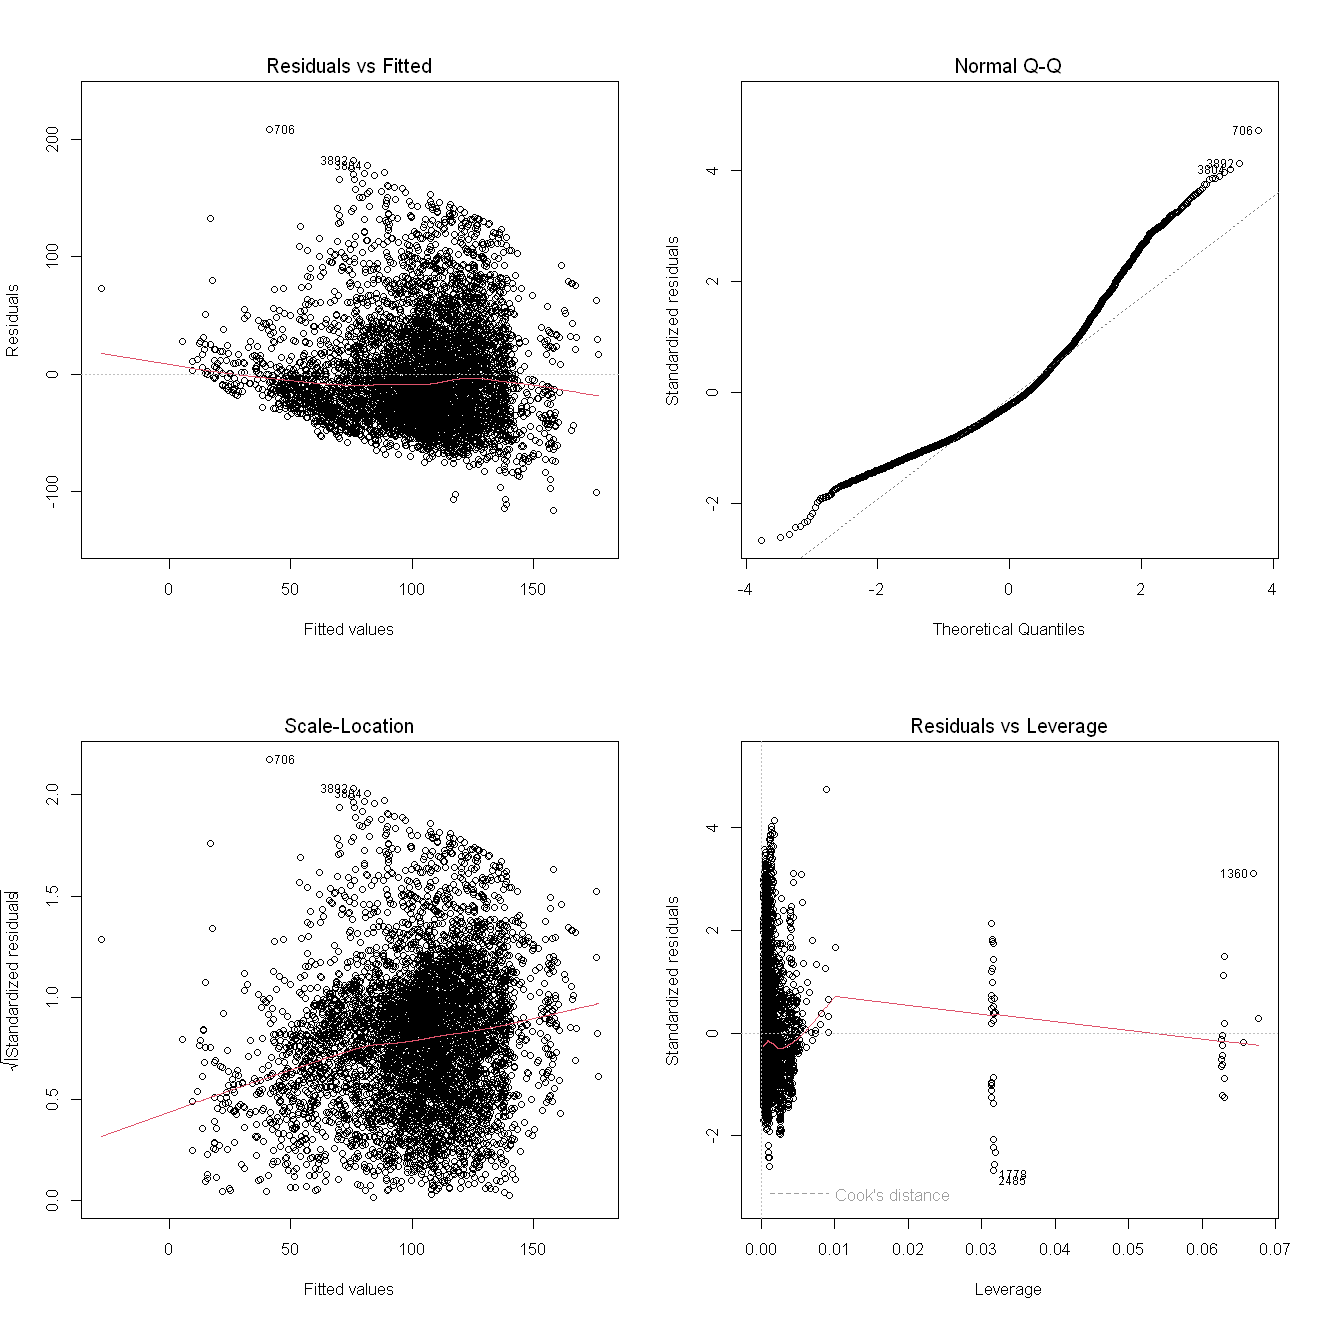

In [46]:
mean(modl2$residuals)
bptest(modl2)
bgtest(modl2)
jarque.bera.test(modl2$residuals)
par(mfrow=c(2,2)) 
plot(modl2)

1º pressuposto: $H_0$-> a média dos resíduos é zero; $E(\epsilon)=0$. É verificado uma vez que a média dos resíduos é muito baixa, aproximando-se muito de zero.

2º pressuposto: $H_0$-> variância constante; $Var({\epsilon}_i)={\sigma}^2_\epsilon = {\sigma}^2$. Como o p-value é praticamente 0 e é inferior a 0.05, tomando 5% como nível de significância, rejeitamos a hipótese nula, então a variância não é constante. O gráfico assim deve apresentar uma estrutura em funil, pois há uma violação da homocedasticidade da variância no modelo em questão.

3º pressuposto: $H_0$-> ausência de autocorrelação; $Cov({\epsilon}_i,{\epsilon}_j)= 0, ({i \neq j})$. O p-value é inferior a 0.05, logo, rejeita-se a hipótese nula, significando que os resíduos estão autocorrelacionados.

4º pressuposto: $H_0$-> distribuição de probabilidades $\epsilon$ é normal; $\epsilon \approx N(0,\sigma)$. O 4º pressuposto, relativo ao teste de Jarque-Bera, também não é verificado, uma vez que o p-value é inferior a 0.05, que obriga à rejeição da hipótese nula. Assim, os resíduos não têm distribuição normal.  

### Modelo 3 - Logaritmizar variáveis 

Para este modelo 3 iremos logaritmizar o preço e o minimum_nights com a colunas já criadas na fase do Data Understanding.Ao logaritmizar, estamos a reduzir o intervalo de valores da variável, onde o modelo pode-se adequar a uma escala menor porque os outliers não fogem tanto à regressão.

**Nota**: não foram utilizadas nos três modelos anteriores, pois queria ser testado a partir das variáveis originais, sem logaritmização

In [47]:
modl3 = lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month + number_of_reviews + calculated_host_listings_count + availability_365, 
    data = sevilla2)
summary(modl3)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month + number_of_reviews + calculated_host_listings_count + 
    availability_365, data = sevilla2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.42149 -0.29647 -0.02003  0.27225  1.87189 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.734e+00  1.362e-02 347.534  < 2e-16 ***
dummy_room_typeHotel room       2.196e-01  7.646e-02   2.873  0.00409 ** 
dummy_room_typePrivate room    -7.005e-01  1.473e-02 -47.551  < 2e-16 ***
dummy_room_typeShared room     -9.907e-01  1.077e-01  -9.195  < 2e-16 ***
log_minimum_nights             -1.883e-01  7.570e-03 -24.870  < 2e-16 ***
reviews_per_month              -4.655e-02  4.464e-03 -10.427  < 2e-16 ***
number_of_reviews              -3.639e-04  7.434e-05  -4.896 1.01e-06 ***
calculated_host_listings_count  2.191e-03  2.297e-04   9.540  < 2e-16 ***
availability_365          

[1] 1.564316e-17


	studentized Breusch-Pagan test

data:  modl3
BP = 407.67, df = 8, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl3
LM test = 160.54, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl3$residuals
X-squared = 100.54, df = 2, p-value < 2.2e-16


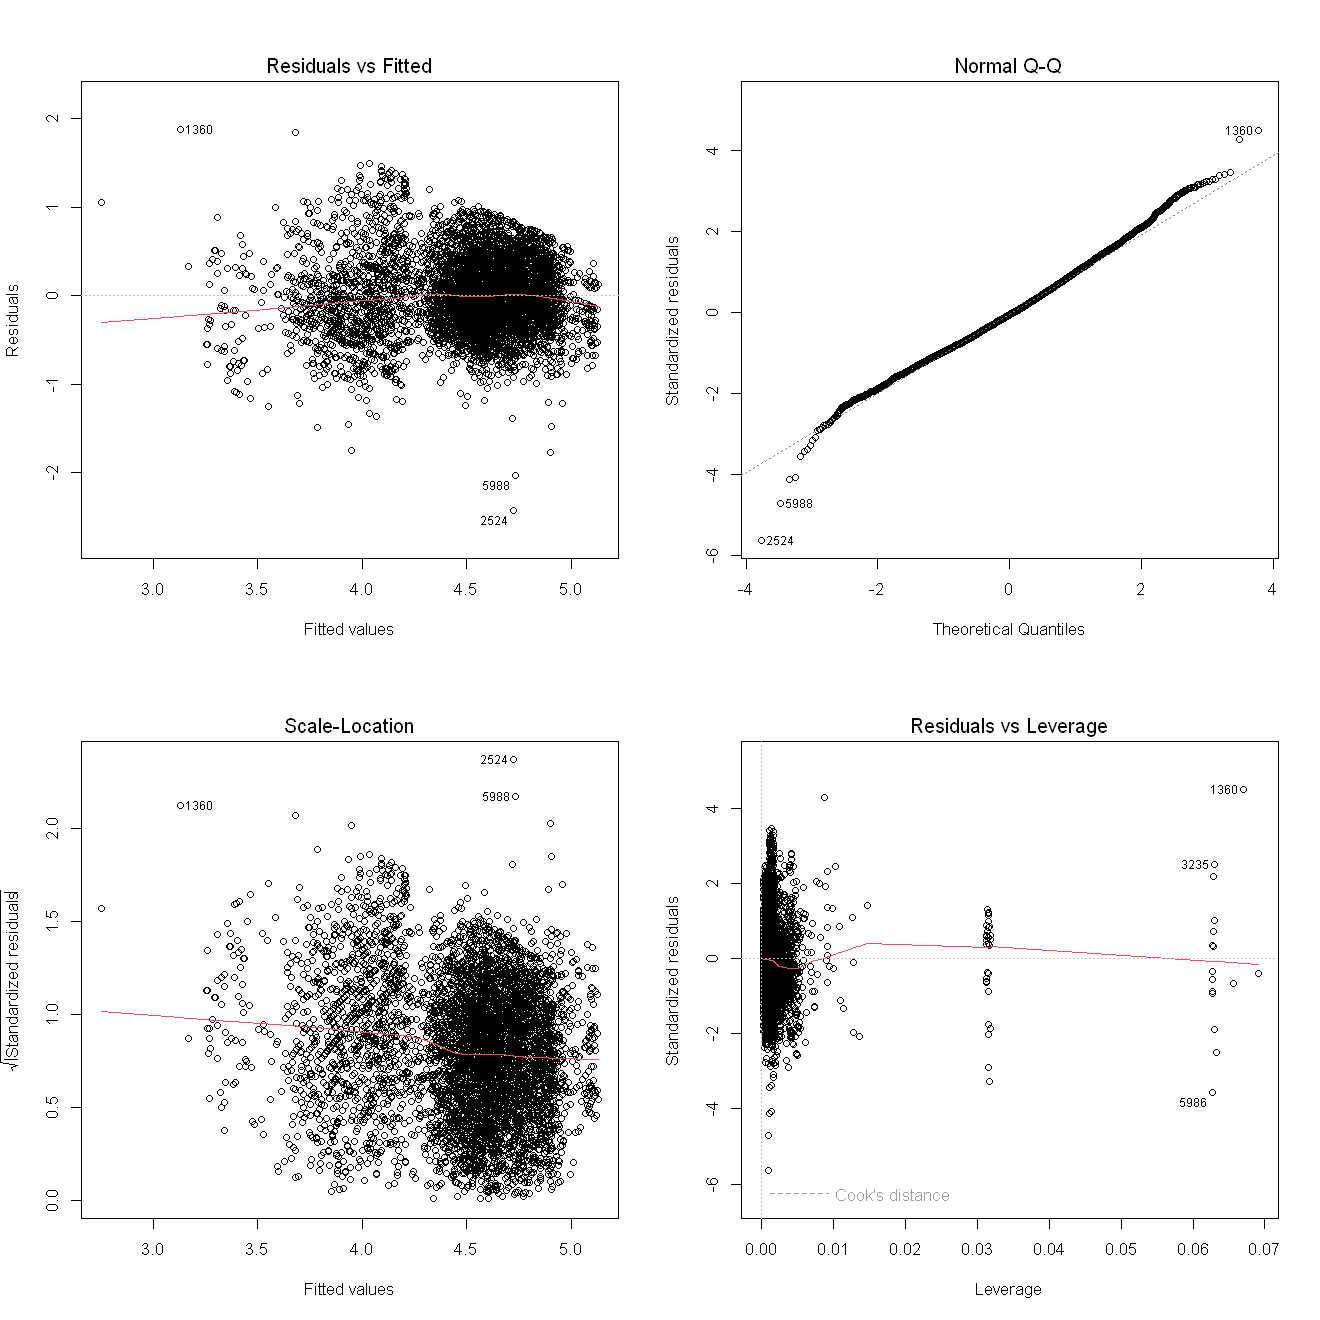

In [48]:
mean(modl3$residuals)
bptest(modl3)
bgtest(modl3)
jarque.bera.test(modl3$residuals)
par(mfrow=c(2,2)) 
plot(modl3)

1º pressuposto: $H_0$-> a média dos resíduos é zero; $E(\epsilon)=0$. É verificado uma vez que a média dos resíduos é muito baixa, aproximando-se muito de zero.

2º pressuposto: $H_0$-> variância constante; $Var({\epsilon}_i)={\sigma}^2_\epsilon = {\sigma}^2$. Como o p-value é praticamente 0 e é inferior a 0.05, tomando 5% como nível de significância, rejeitamos a hipótese nula, então a variância não é constante. O gráfico assim deve apresentar uma estrutura em funil, pois há uma violação da homocedasticidade da variância no modelo em questão.

3º pressuposto: $H_0$-> ausência de autocorrelação; $Cov({\epsilon}_i,{\epsilon}_j)= 0, ({i \neq j})$. O p-value é inferior a 0.05, logo, rejeita-se a hipótese nula, significando que os resíduos estão autocorrelacionados.

4º pressuposto: $H_0$-> distribuição de probabilidades $\epsilon$ é normal; $\epsilon \approx N(0,\sigma)$. O 4º pressuposto, relativo ao teste de Jarque-Bera, também não é verificado, uma vez que o p-value é inferior a 0.05, que obriga à rejeição da hipótese nula. Assim, os resíduos não têm distribuição normal.  

In [49]:
outlierTest(modl3)

      rstudent unadjusted p-value Bonferroni p
2524 -5.648419         1.6935e-08   0.00010192
5988 -4.726204         2.3397e-06   0.01408000
1360  4.514086         6.4804e-06   0.03899900

Como podemos observar este modelo tem apenas três outliers que provavelmente estão a influenciar no modelo para este não ser normalmente distribuído.

### Modelo 4 - Interação entre variáveis

Como já vimos na matriz de correlação e no correlograma, as variáveis reviews_per_month e number of reviews apresentam uma correlação bem mais elevada comparativamente com as restantes colunas da base de dados. Assim, surgiu a ideia de realizar um teste onde adicionaríamos uma interação de variáveis às ditas anteriormente.

In [50]:
modl4 = lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + calculated_host_listings_count + availability_365, 
    data = sevilla2)
summary(modl4)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + calculated_host_listings_count + 
    availability_365, data = sevilla2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43362 -0.29437 -0.02098  0.26790  1.87057 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          4.751e+00  1.420e-02 334.601  < 2e-16 ***
dummy_room_typeHotel room            2.132e-01  7.637e-02   2.792  0.00526 ** 
dummy_room_typePrivate room         -7.043e-01  1.474e-02 -47.788  < 2e-16 ***
dummy_room_typeShared room          -9.998e-01  1.076e-01  -9.291  < 2e-16 ***
log_minimum_nights                  -1.868e-01  7.567e-03 -24.684  < 2e-16 ***
reviews_per_month                   -5.133e-02  4.599e-03 -11.163  < 2e-16 ***
number_of_reviews                   -8.464e-04  1.358e-04  -6.230 4.97e-10 ***
calculated_host_listings_count       2.156e-03  2.295e-04   

Veremos agora os pressupostos dos resíduos para o modelo em questão.

[1] 1.887911e-17


	studentized Breusch-Pagan test

data:  modl4
BP = 400.28, df = 9, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl4
LM test = 156.2, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl4$residuals
X-squared = 105.2, df = 2, p-value < 2.2e-16


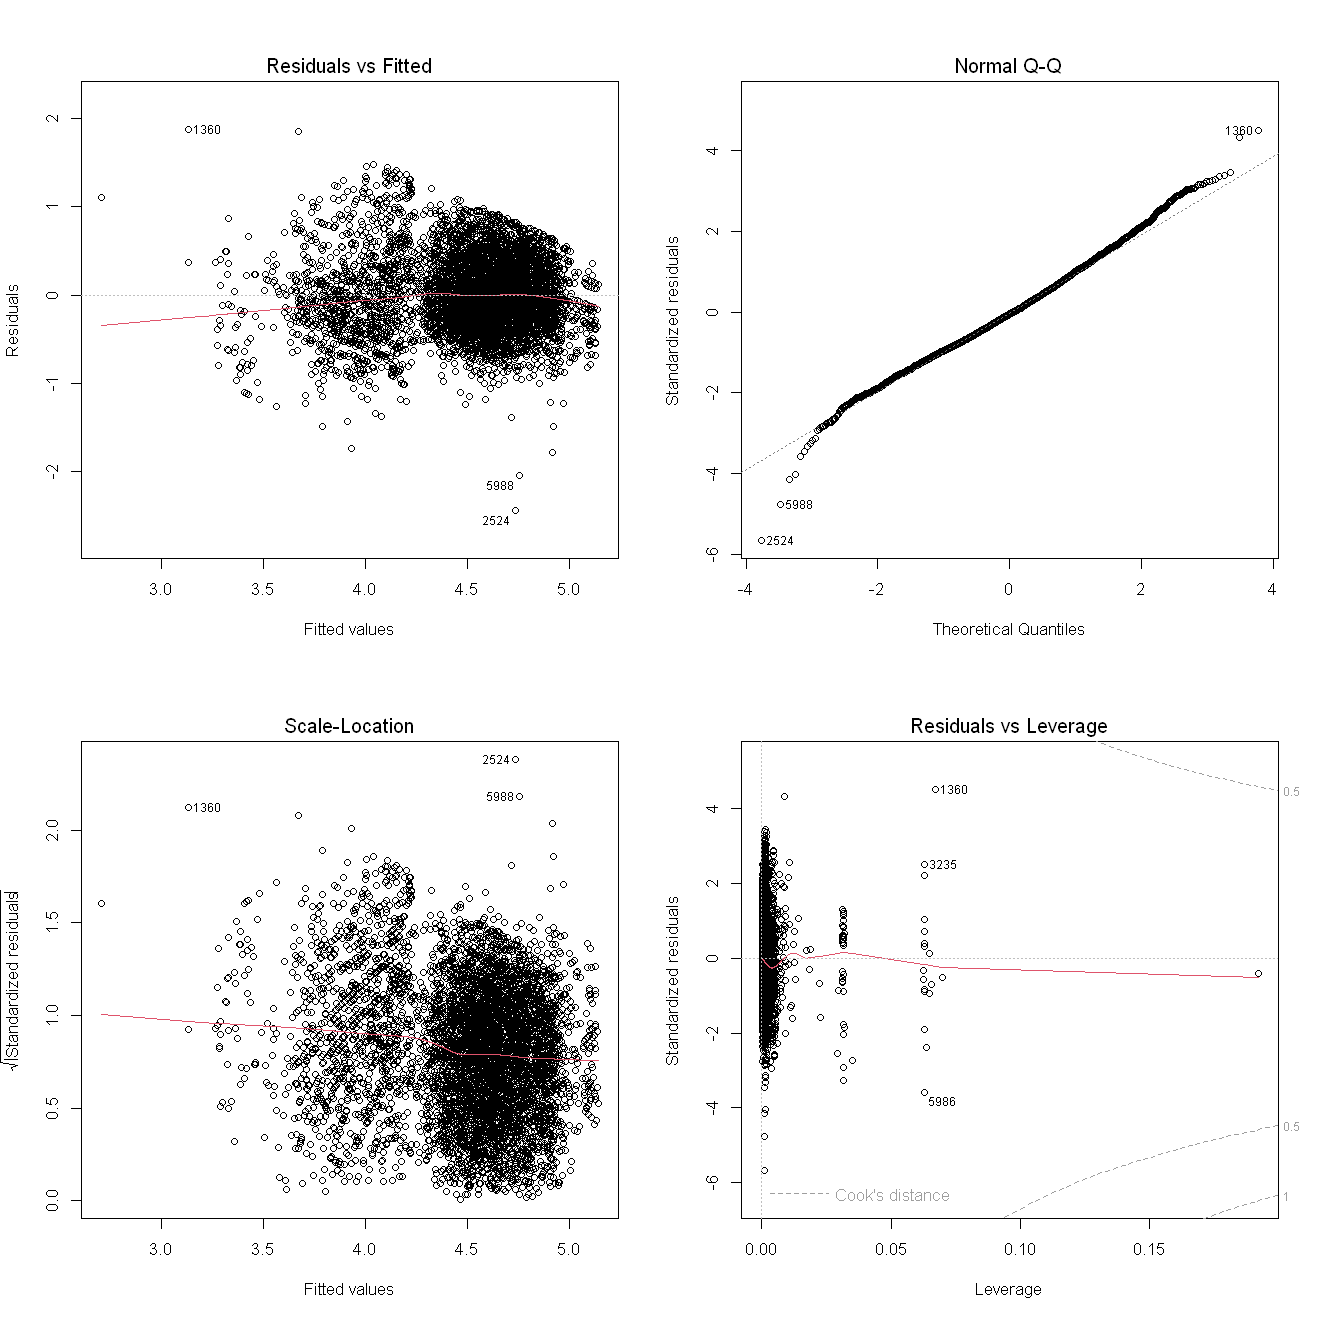

In [51]:
mean(modl4$residuals)
bptest(modl4)
bgtest(modl4)
jarque.bera.test(modl4$residuals)
par(mfrow=c(2,2)) 
plot(modl4)

1º pressuposto: $H_0$-> a média dos resíduos é zero; $E(\epsilon)=0$. É verificado uma vez que a média dos resíduos é muito baixa, aproximando-se muito de zero.

2º pressuposto: $H_0$-> variância constante; $Var({\epsilon}_i)={\sigma}^2_\epsilon = {\sigma}^2$. Como o p-value é praticamente 0 e é inferior a 0.05, tomando 5% como nível de significância, rejeitamos a hipótese nula, então a variância não é constante. O gráfico assim deve apresentar uma estrutura em funil, pois há uma violação da homocedasticidade da variância no modelo em questão.

3º pressuposto: $H_0$-> ausência de autocorrelação; $Cov({\epsilon}_i,{\epsilon}_j)= 0, ({i \neq j})$. O p-value é inferior a 0.05, logo, rejeita-se a hipótese nula, significando que os resíduos estão autocorrelacionados.

4º pressuposto: $H_0$-> distribuição de probabilidades $\epsilon$ é normal; $\epsilon \approx N(0,\sigma)$. O 4º pressuposto, relativo ao teste de Jarque-Bera, também não é verificado, uma vez que o p-value é inferior a 0.05, que obriga à rejeição da hipótese nula. Assim, os resíduos não têm distribuição normal.  

### Modelo 5 - Aplicação da variável neighbourhood_group

Neste próximo modelo tentámos utilizar mais uma variável categórica, ainda não criada como uma coluna na base de dados, o neighbourhood_group. Numa variável dummy onde seria 1 quando esta variável fosse Casco Antiguo e 0 quando fosse uma das restantes, devido à descrepância dos valores da coluna. Podemos ver isso no output abaixo.

In [52]:
summary(as.factor(sevilla2$neighbourhood_group))[1]
summary(as.factor(sevilla2$neighbourhood_group))[2:11]

Casco Antiguo 
         4116

Cerro - Amate Este - Alcosa - Torreblanca 
                         54                          53 
               Los Remedios                    Macarena 
                        158                         187 
           Macarena - Norte                     Nervión 
                         70                         318 
       Palmera - Bellavista     San Pablo - Santa Justa 
                        101                         130 
                        Sur                      Triana 
                        107                         724

Será utilizado um ifelse para a substituição por 1 a região de Casco Antiguo e 0 para as restantes, que aparecem com menor frequência.

In [53]:
sevilla3=sevilla2
sevilla3$dummy_ng <-(ifelse(sevilla3$neighbourhood_group == "Casco Antiguo" , 1, 0))
sevilla3

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,⋯,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,log_price,log_minimum_nights,dummy_room_type,dummy_ng
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<fct>,<dbl>
1,Explore Cultural Sights from a Family-Friendly Apartment,139939,Alejandro,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99,2,⋯,2020-01-08,1.18,1,117,0,CTC-2018150852,4.595120,0.6931472,Entire home/apt,1
2,BEAUTIFUL APARTMENT IN SEVILLE,224697,Walter,Casco Antiguo,San Lorenzo,37.39898,-5.99533,Entire home/apt,75,3,⋯,2020-02-17,0.30,1,241,0,VFT/SE/01116,4.317488,1.0986123,Entire home/apt,1
3,(2) ROOM + PRIVATE BATHROOM. CASA DEL BUEN VIAJE,503692,Margot,Casco Antiguo,San Bartolomé,37.38816,-5.98537,Private room,79,2,⋯,2022-06-06,0.64,6,360,11,H/SE/01244,4.369448,0.6931472,Private room,1
4,Sunny apt in heart of seville!!,560040,Pepe,Casco Antiguo,San Lorenzo,37.39794,-5.99795,Entire home/apt,84,2,⋯,2022-09-19,1.16,2,44,8,VFT/SE/05126,4.430817,0.6931472,Entire home/apt,1
5,TERRACE ALAMEDA. WIFI GARAGE DOWNTOWN,589600,Miguel,Casco Antiguo,San Lorenzo,37.39941,-5.99379,Entire home/apt,85,3,⋯,2022-09-08,0.77,10,119,22,VFT/SE/00748,4.442651,1.0986123,Entire home/apt,1
6,"Walk to the Cathedral!! ATICO DUPLEX, WIFI.",589600,Miguel,Casco Antiguo,Arenal,37.38551,-5.99497,Entire home/apt,83,3,⋯,2022-09-08,1.54,10,313,40,VFT/SE/00834,4.418841,1.0986123,Entire home/apt,1
7,"Walk to the Cathedral!! DUPLEX ARENAL, WIFI.",589600,Miguel,Casco Antiguo,Arenal,37.38549,-5.99506,Entire home/apt,78,3,⋯,2022-09-11,0.97,10,339,26,CTC-2018177111,4.356709,1.0986123,Entire home/apt,1
8,apto lujo 2 D en el Arenal (Sevilla),629861,Alvaro,Casco Antiguo,Arenal,37.38671,-5.99581,Entire home/apt,106,64,⋯,2019-11-24,0.03,2,22,0,,4.663439,4.1588831,Entire home/apt,1
9,Bamberg Duplex Private Terrace Old town 5 pax,860055,Maria,Casco Antiguo,Santa Cruz,37.38731,-5.99095,Entire home/apt,150,3,⋯,2022-09-11,1.28,23,231,13,VFT/SE/0426,5.010635,1.0986123,Entire home/apt,1


In [54]:
modl5=lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + calculated_host_listings_count+
    dummy_ng, 
    data = sevilla3)
summary(modl5)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + calculated_host_listings_count + 
    dummy_ng, data = sevilla3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57873 -0.28840 -0.02281  0.26250  1.92044 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          4.672e+00  1.396e-02 334.550  < 2e-16 ***
dummy_room_typeHotel room            1.603e-01  7.476e-02   2.144    0.032 *  
dummy_room_typePrivate room         -6.433e-01  1.472e-02 -43.692  < 2e-16 ***
dummy_room_typeShared room          -1.044e+00  1.053e-01  -9.913  < 2e-16 ***
log_minimum_nights                  -1.828e-01  7.408e-03 -24.679  < 2e-16 ***
reviews_per_month                   -5.422e-02  4.493e-03 -12.067  < 2e-16 ***
number_of_reviews                   -1.046e-03  1.329e-04  -7.871 4.13e-15 ***
calculated_host_listings_count       1.997e-03  2.246e-04   8.889  <

[1] -2.238306e-17


	studentized Breusch-Pagan test

data:  modl5
BP = 287.98, df = 9, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl5
LM test = 134.76, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl5$residuals
X-squared = 108.78, df = 2, p-value < 2.2e-16


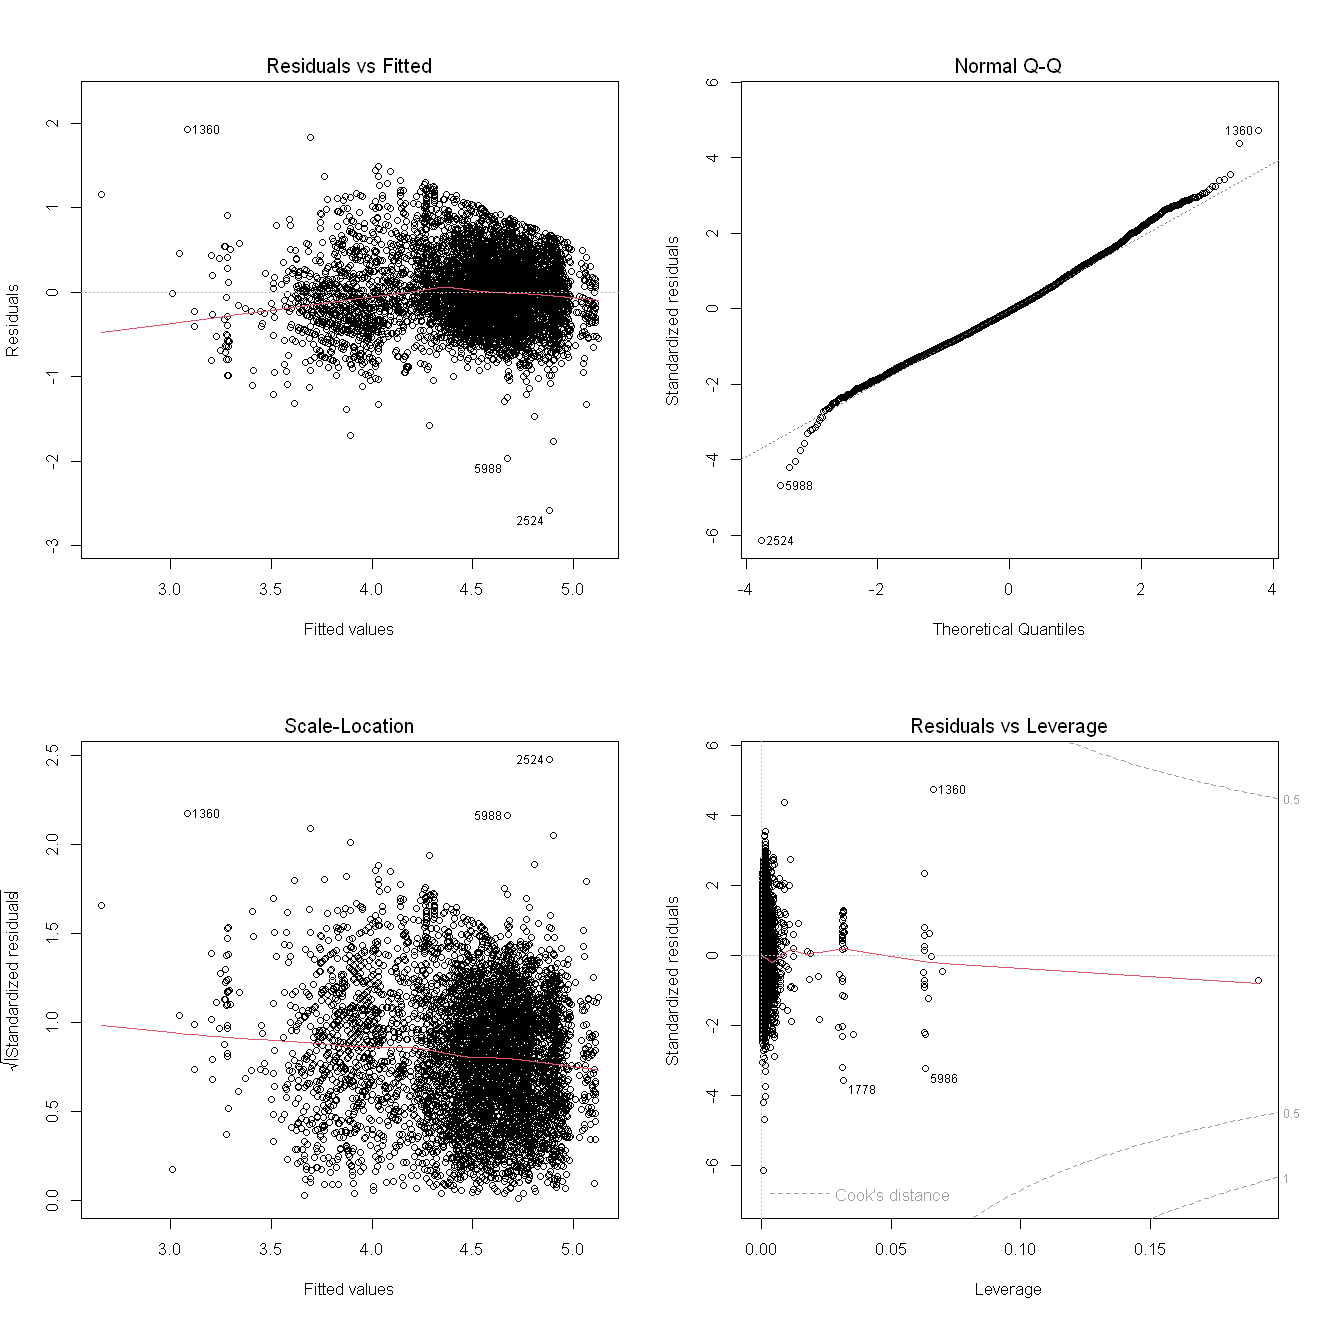

In [55]:
mean(modl5$residuals)
bptest(modl5)
bgtest(modl5)
jarque.bera.test(modl5$residuals)
par(mfrow=c(2,2)) 
plot(modl5)

1º pressuposto: $H_0$-> a média dos resíduos é zero; $E(\epsilon)=0$. É verificado uma vez que a média dos resíduos é muito baixa, aproximando-se muito de zero.

2º pressuposto: $H_0$-> variância constante; $Var({\epsilon}_i)={\sigma}^2_\epsilon = {\sigma}^2$. Como o p-value é praticamente 0 e é inferior a 0.05, tomando 5% como nível de significância, rejeitamos a hipótese nula, então a variância não é constante. O gráfico assim deve apresentar uma estrutura em funil, pois há uma violação da homocedasticidade da variância no modelo em questão.

3º pressuposto: $H_0$-> ausência de autocorrelação; $Cov({\epsilon}_i,{\epsilon}_j)= 0, ({i \neq j})$. O p-value é inferior a 0.05, logo, rejeita-se a hipótese nula, significando que os resíduos estão autocorrelacionados.

4º pressuposto: $H_0$-> distribuição de probabilidades $\epsilon$ é normal; $\epsilon \approx N(0,\sigma)$. O 4º pressuposto, relativo ao teste de Jarque-Bera, também não é verificado, uma vez que o p-value é inferior a 0.05, que obriga à rejeição da hipótese nula. Assim, os resíduos não têm distribuição normal.  

### Modelo 6 - Estudo de não linearidade entre variáveis

Veremos se será necessário utilizar variáveis polinomiais no modelo atual, melhor até agora.

**NOTA:** não tirar comentário no chunk de código abaixo, por favor

In [56]:
#crPlots(modl5)

Foi corrido o comando acima que retornou o seguinte **erro** na tela.

#*Error in crPlots.default(modl5): C+R plots not available for models with interactions.*

Este erro surge porque o nosso modelo atual, o modelo 5, já tem uma interação entre variáveis, que impossibilita a execução dos gráficos. Por isso, foi utilizado o modelo 3 (não tão eficiente), que foi o último sem a criação da interação entre as variáveis e sem a variável dummy_ng, que só possui dois valores possíveis: 0 e 1.

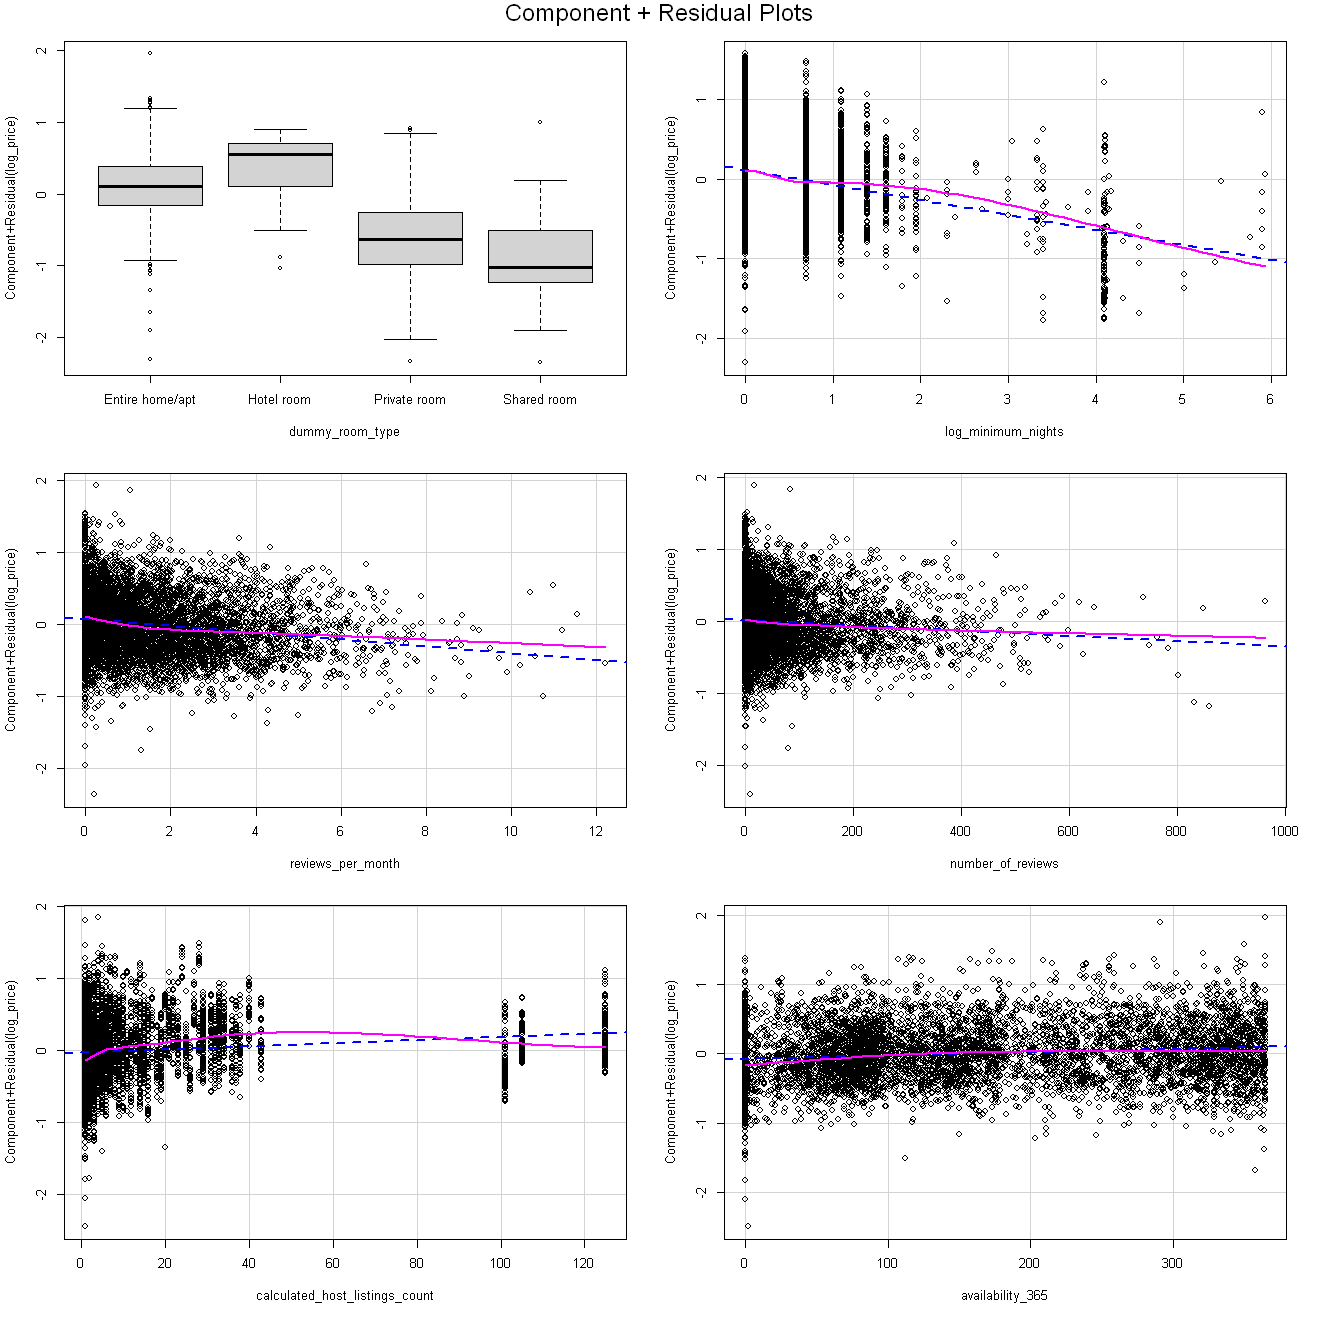

In [57]:
crPlots(modl3)

Há uma não-linearidade mais acentuada na variável *calculated_host_listings_count*.

Agora iremos tentar fazer um teste com polinomial na variável do número de hóspedes, pois é uma variável que apresenta uma não linearidade, utilizando o comando crPlots acima, num modelo sem interação de variáveis (modl3). Começaremos por um polinómio de grau 2.

In [58]:
modl6=lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=2,raw=TRUE)+
    availability_365+dummy_ng, 
    data = sevilla3)
summary(modl6)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 2, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44241 -0.27617 -0.02736  0.25165  1.80544 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.552e+00
dummy_room_typeHotel room                                      1.673e-01
dummy_room_typePrivate room                                   -6.481e-01
dummy_room_typeShared room                                    -1.018e+00
log_minimum_nights                                            -1.688e-01
reviews_per_month                                             -4.635e-02
number_of_reviews                                             -8.564e-04
poly(calculated_host_listings_count, degree = 2, raw = TRUE)1  1.00

Todas as variáveis são significativas para o intervalo de significância de 5%.
Tentemos fazer com polinómios de grau maior.

In [59]:
modl6_1=lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+
    availability_365+dummy_ng, 
    data = sevilla3)
summary(modl6_1)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 3, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41220 -0.27459 -0.02716  0.24947  1.79636 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.523e+00
dummy_room_typeHotel room                                      1.560e-01
dummy_room_typePrivate room                                   -6.539e-01
dummy_room_typeShared room                                    -1.022e+00
log_minimum_nights                                            -1.681e-01
reviews_per_month                                             -4.848e-02
number_of_reviews                                             -8.224e-04
poly(calculated_host_listings_count, degree = 3, raw = TRUE)1  1.97

Novamente, todos os parâmetros são significativos, logo tentemos aumentar mais o grau da variável.

In [60]:
modl6_2=lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=4,raw=TRUE)+
    availability_365+dummy_ng, 
    data = sevilla3)
summary(modl6_2)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 4, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41071 -0.27475 -0.02753  0.25078  1.79637 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.520e+00
dummy_room_typeHotel room                                      1.553e-01
dummy_room_typePrivate room                                   -6.540e-01
dummy_room_typeShared room                                    -1.022e+00
log_minimum_nights                                            -1.680e-01
reviews_per_month                                             -4.852e-02
number_of_reviews                                             -8.179e-04
poly(calculated_host_listings_count, degree = 4, raw = TRUE)1  2.08

Com grau 4 já não é tão significativo, para um nível de insignificância de 5% ou de 1%, logo paramos e retomamos o modelo de polinómio de grau 3, guardado na variável *modl6_1*.

[1] -1.510374e-17


	studentized Breusch-Pagan test

data:  modl6_1
BP = 351.82, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl6_1
LM test = 125.75, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl6_1$residuals
X-squared = 139.17, df = 2, p-value < 2.2e-16


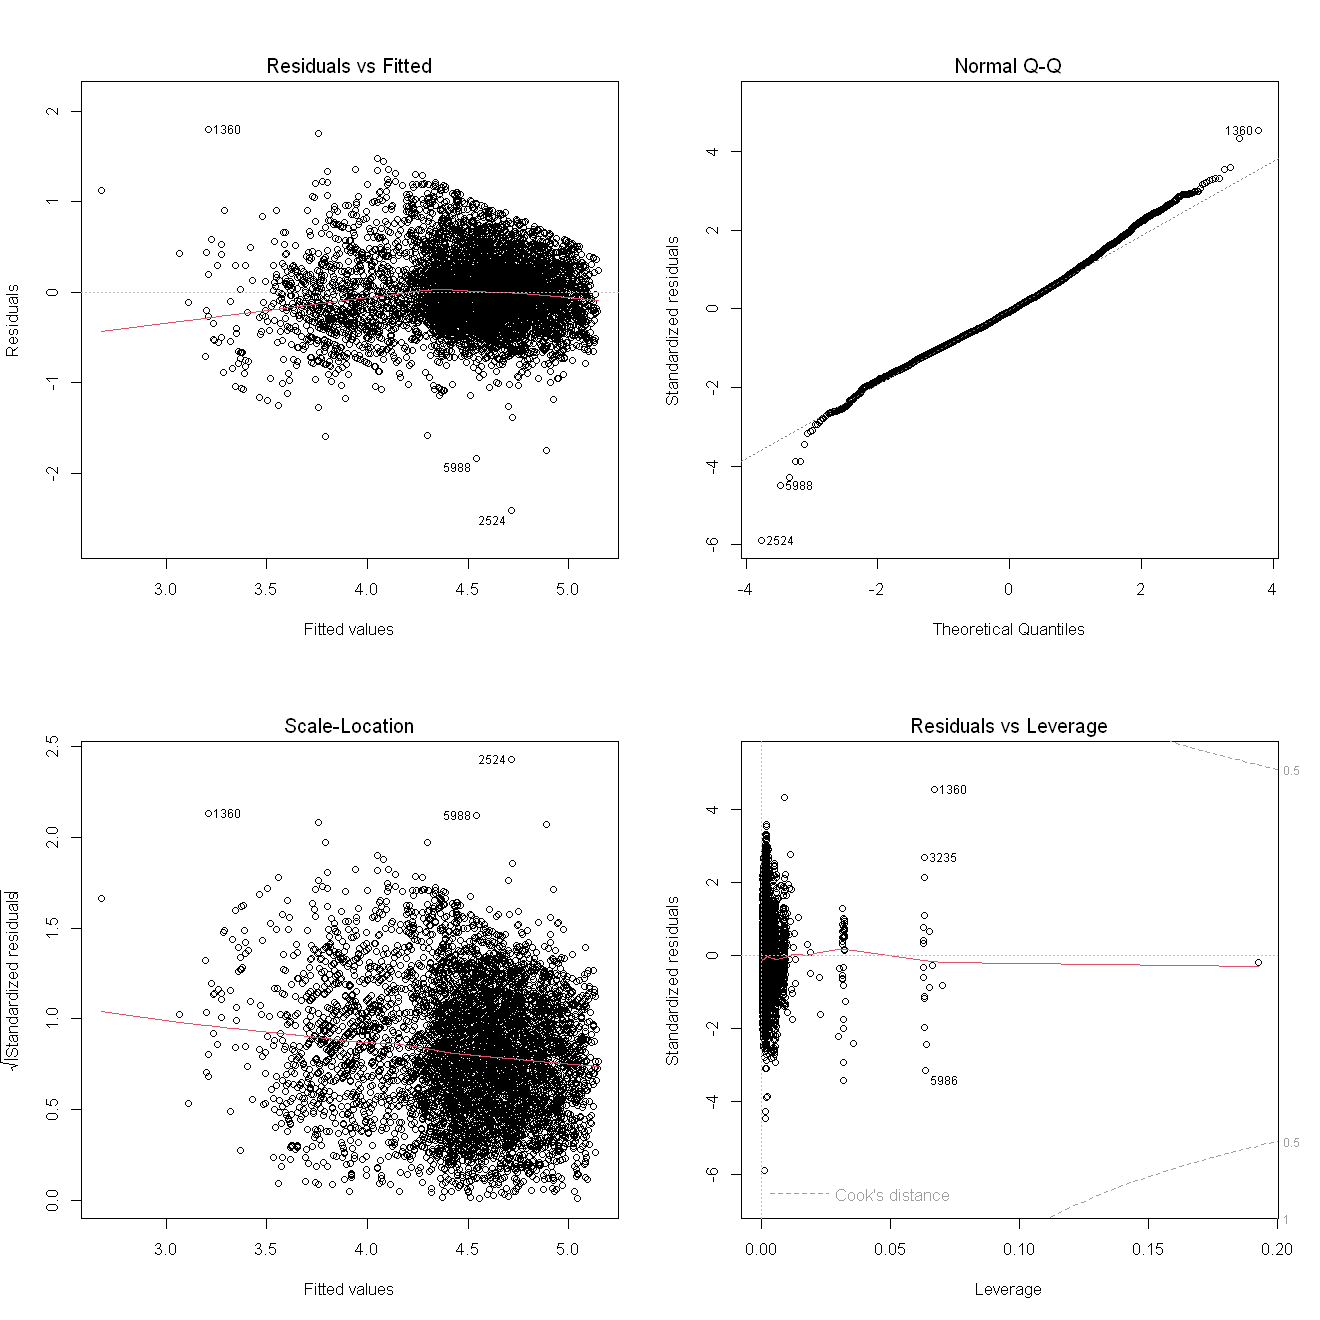

In [61]:
mean(modl6_1$residuals)
bptest(modl6_1)
bgtest(modl6_1)
jarque.bera.test(modl6_1$residuals)
par(mfrow=c(2,2)) 
plot(modl6_1)

Mais uma vez, os pressupostos dos resíduos não são verificados, fora o 1º pressuposto, da média ser nula.

Já foram propostas algumas ideias para um modelo que explique a variável do preço, tendo-se obtido bons valores para o coeficiente de determinação $R^2$.

Para tal, iremos inspirar-nos nos modelos já propostos para adicionar pesos ao modelo, com a expectativa de os pressupostos dos resíduos serem verificados.

## Modelo 7 - Aplicação de pesos

Comecemos por realizar um modelo com o tamanho da coluna price como parâmetro no peso para o modelo.

In [62]:
N <- length(sevilla3$log_price)
modl7= lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = sevilla3 ,weights = 1/((1:N)^.5))
summary(modl7)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 3, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3, 
    weights = 1/((1:N)^0.5))

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.33830 -0.03936 -0.00240  0.03690  0.31753 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.485e+00
dummy_room_typeHotel room                                      1.840e-01
dummy_room_typePrivate room                                   -6.591e-01
dummy_room_typeShared room                                    -1.017e+00
log_minimum_nights                                            -1.351e-01
reviews_per_month                                             -3.714e-02
number_of_reviews                                             -6.462e-04
poly(calculated_host_listing

Através do output é possível identificar que o $R^2$ não melhorou muito mais, mas que todas as variáveis continuam significativas.

Veremos agora os pressupostos dos resíduos.

[1] 0.006801345


	studentized Breusch-Pagan test

data:  modl7
BP = 41.87, df = 12, p-value = 3.503e-05



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl7
LM test = 125.75, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl7$residuals
X-squared = 146.37, df = 2, p-value < 2.2e-16


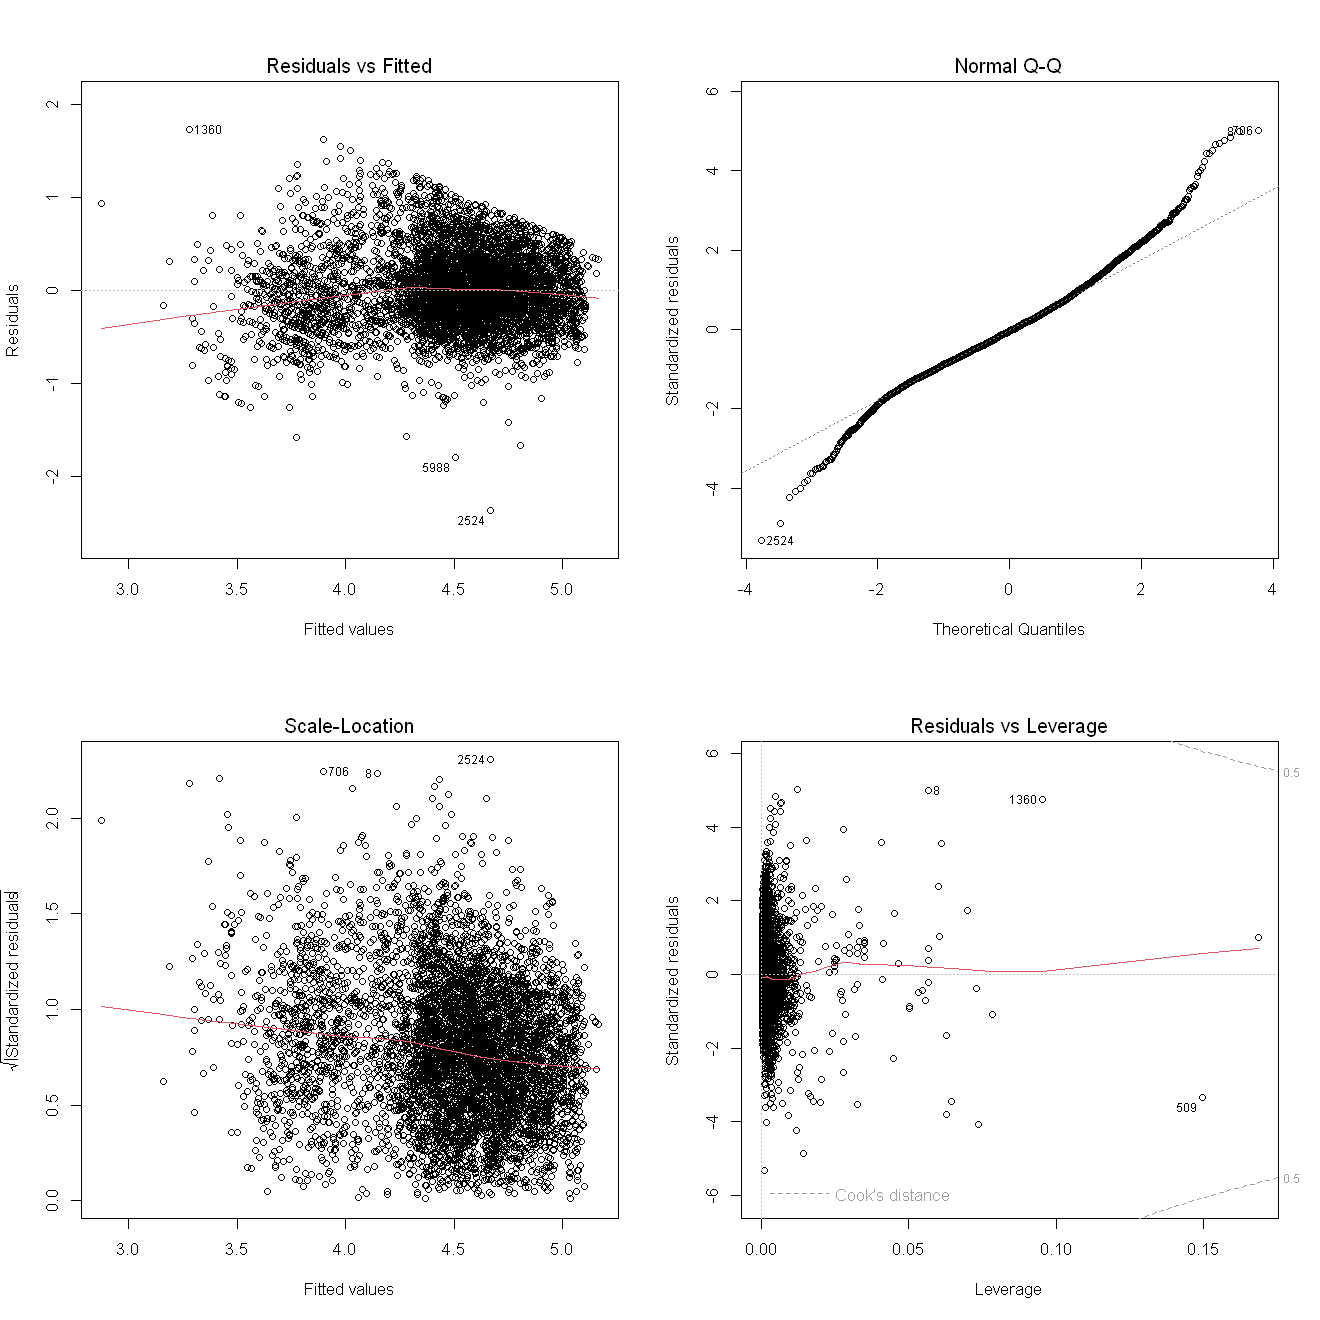

In [63]:
mean(modl7$residuals)
bptest(modl7)
bgtest(modl7)
jarque.bera.test(modl7$residuals)
par(mfrow=c(2,2)) 
plot(modl7)

O 1º pressuposto, onde a hipótese nula refere à média dos resíduos ser nula, continua a ser verificado.

Os restantes 3 pressupostos não continuam a ser verificados, mas notou-se um aumento do p-value no segundo pressuposto, que não consegue ser distinguido no gráfico, pois nota-se ainda a presença de um funil.

## Modelo 8

Será testado outro peso com valores preditos do modelo 6_1 (polinómio de grau 3 na variável do número de hóspedes), que foi caracterizado como o melhor modelo sem pesos, até agora.

In [64]:
yhat<- predict(modl6_1,data=sevilla3)
w <- 1/sqrt(yhat)
modl8= lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = sevilla3 ,weights = w)
summary(modl8)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 3, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3, 
    weights = w)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.64003 -0.18860 -0.01913  0.17140  1.34184 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.523e+00
dummy_room_typeHotel room                                      1.498e-01
dummy_room_typePrivate room                                   -6.589e-01
dummy_room_typeShared room                                    -1.019e+00
log_minimum_nights                                            -1.693e-01
reviews_per_month                                             -4.902e-02
number_of_reviews                                             -8.267e-04
poly(calculated_host_listings_count, deg

Serão observados os pressupostos dos resíduos para este modelo.

[1] 5.809099e-05


	studentized Breusch-Pagan test

data:  modl8
BP = 440.26, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl8
LM test = 125.75, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl8$residuals
X-squared = 143.24, df = 2, p-value < 2.2e-16


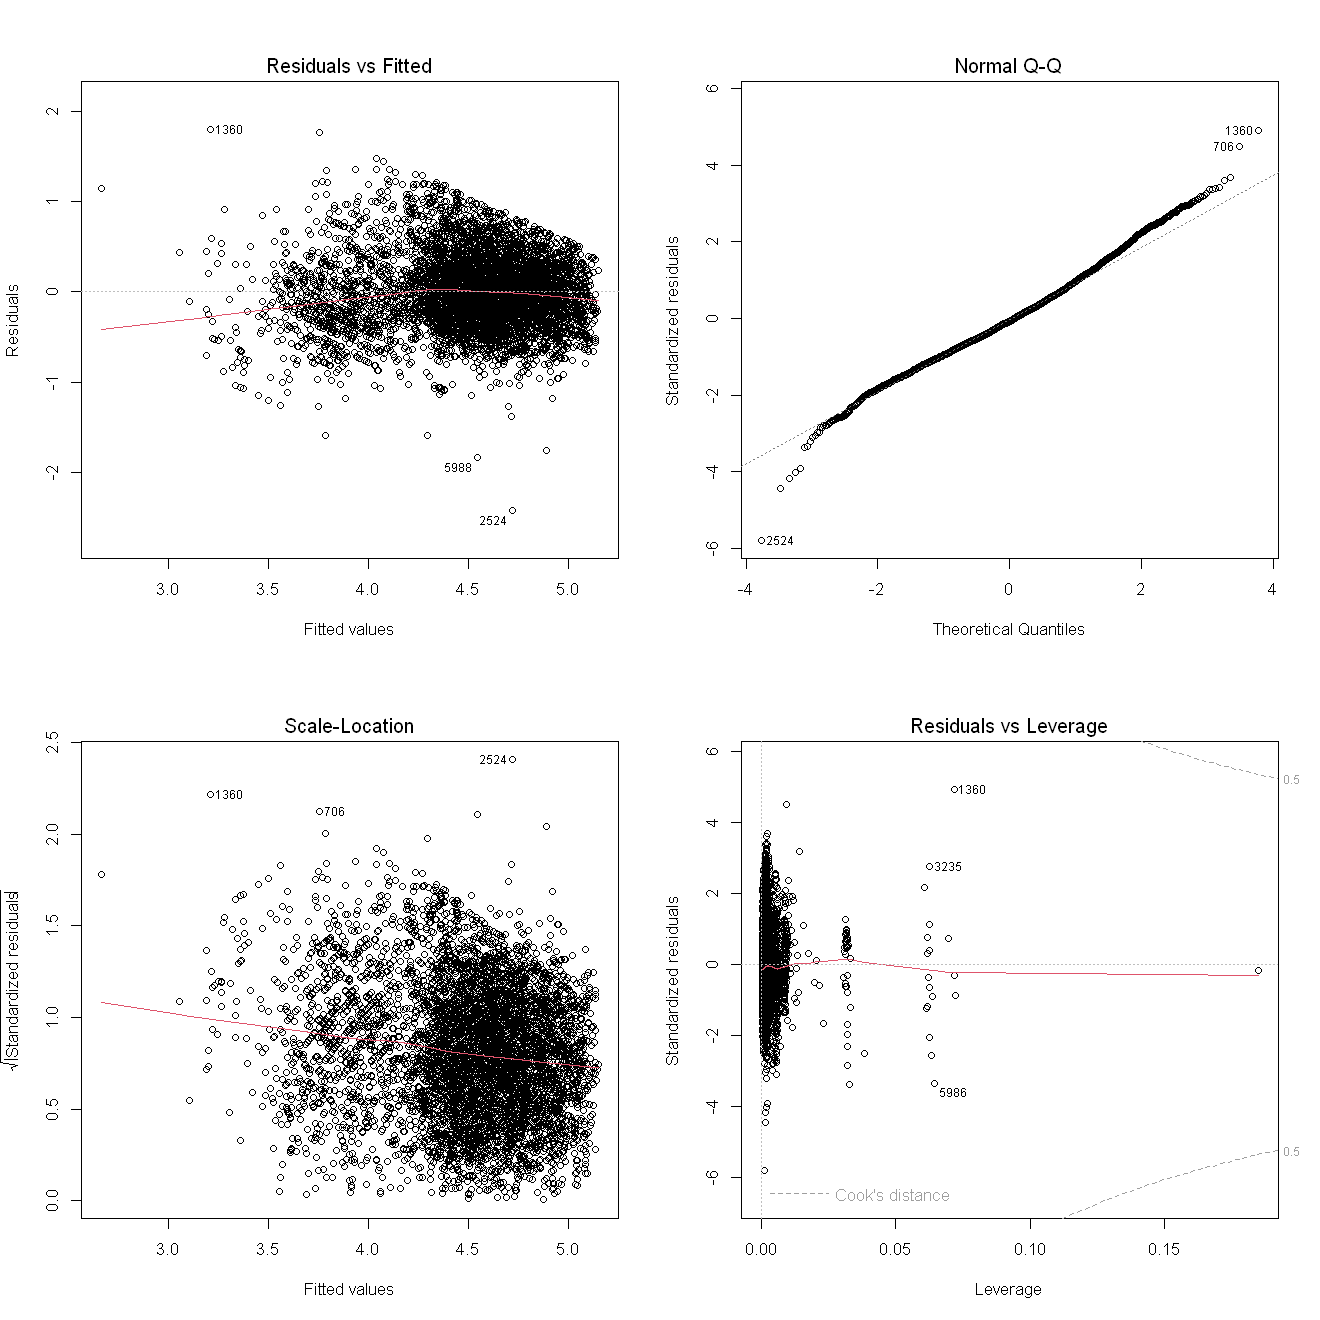

In [65]:
mean(modl8$residuals)
bptest(modl8)
bgtest(modl8)
jarque.bera.test(modl8$residuals)
par(mfrow=c(2,2)) 
plot(modl8)

Mais uma vez, os pressupostos não foram verificados a não ser o 1º, da média ser nula. 

## Modelo 9 

Faremos o mesmo modelo que este último, mas alterando os valores dos pesos para o seu inverso: $\frac{1}{w}$.

In [66]:
modl9= lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = sevilla3 ,weights = 1/w)
summary(modl9)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 3, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3, 
    weights = 1/w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.5480 -0.4007 -0.0405  0.3648  2.4434 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.523e+00
dummy_room_typeHotel room                                      1.621e-01
dummy_room_typePrivate room                                   -6.487e-01
dummy_room_typeShared room                                    -1.024e+00
log_minimum_nights                                            -1.669e-01
reviews_per_month                                             -4.794e-02
number_of_reviews                                             -8.167e-04
poly(calculated_host_listings_count, degree = 3,

[1] -0.0001760179


	studentized Breusch-Pagan test

data:  modl9
BP = 4648, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl9
LM test = 125.75, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl9$residuals
X-squared = 134.93, df = 2, p-value < 2.2e-16


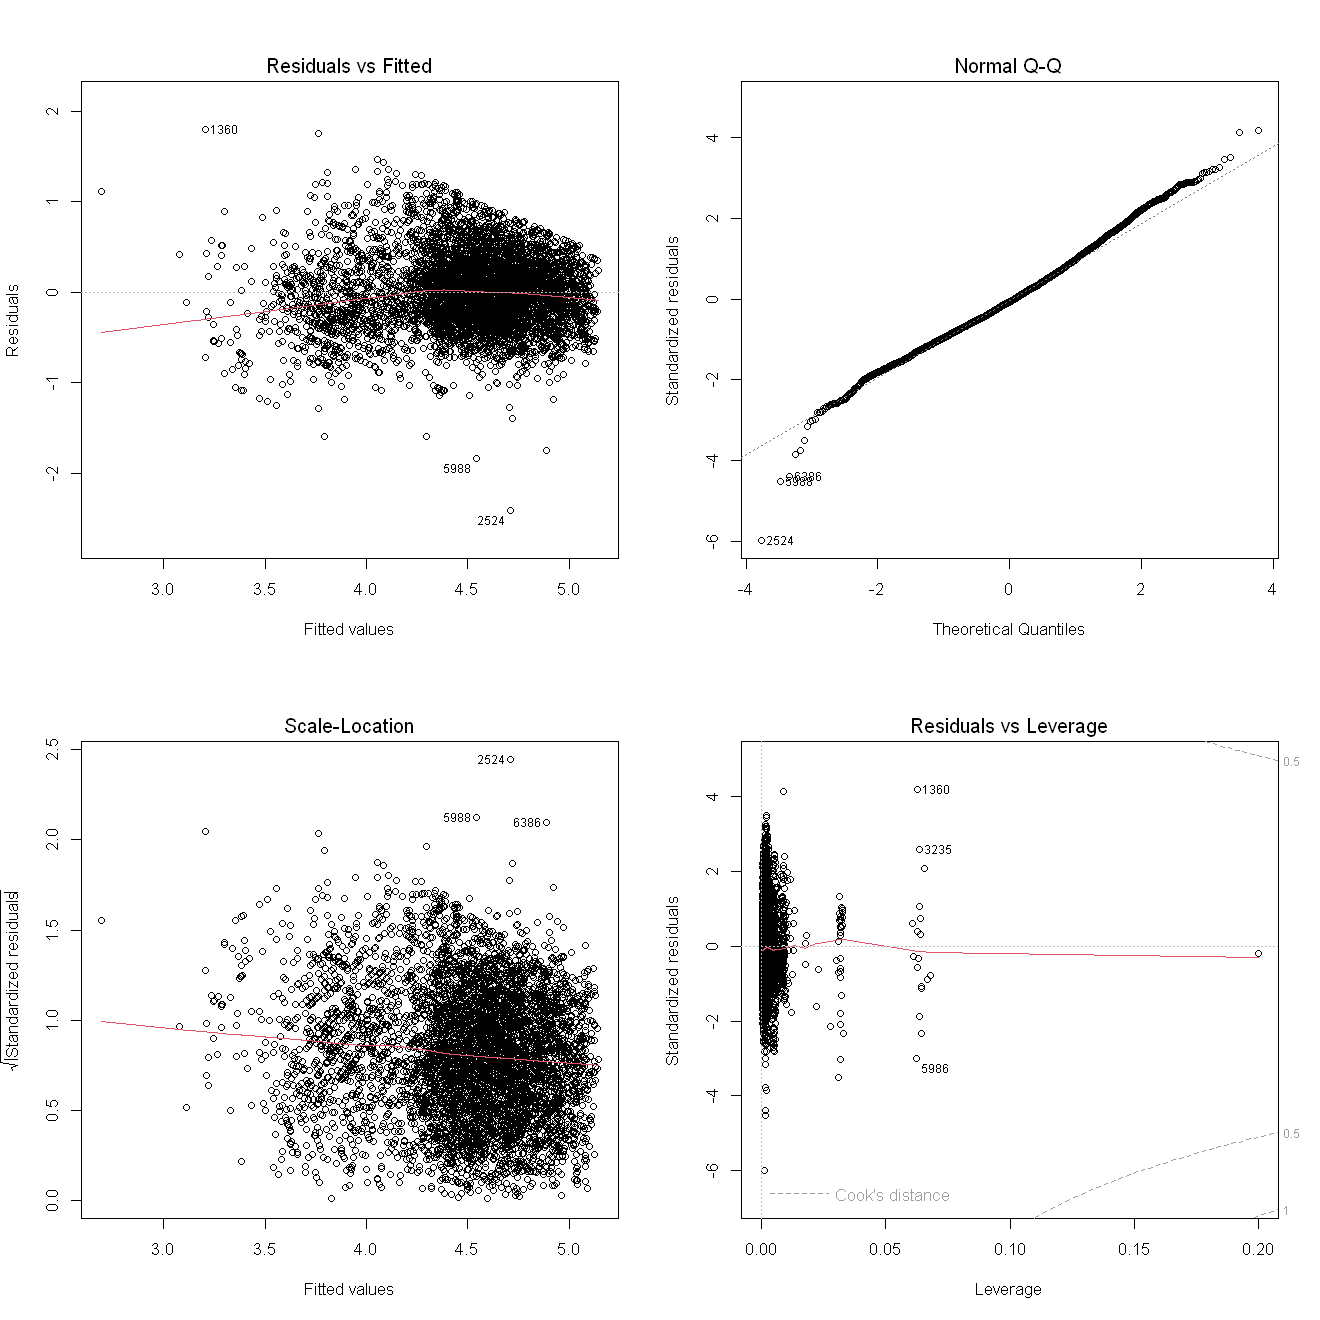

In [67]:
mean(modl9$residuals)
bptest(modl9)
bgtest(modl9)
jarque.bera.test(modl9$residuals)
par(mfrow=c(2,2)) 
plot(modl9)

Apesar deste modelo ser bastante semelhante ao anterior, verificamos que o coeficiente de determinação, $R^2$, é inferior ao do modelo 8 (modl8). Os pressupostos mantêm-se iguais aos restantes modelos, sendo verificado só o primeiro. 

## Modelo 10

Agora, será utilizado com a raiz quadrada dos valores preditos dos resíduos do modelo 6_1.

In [68]:
h<-sqrt(modl6_1$residuals^2)
modl10=lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = sevilla3 ,weights = 1/h)
summary(modl10)


Call:
lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month * number_of_reviews + poly(calculated_host_listings_count, 
    degree = 3, raw = TRUE) + availability_365 + dummy_ng, data = sevilla3, 
    weights = 1/h)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.5501 -0.5191 -0.1458  0.5037  1.3674 

Coefficients:
                                                                Estimate
(Intercept)                                                    4.520e+00
dummy_room_typeHotel room                                      2.423e-01
dummy_room_typePrivate room                                   -6.603e-01
dummy_room_typeShared room                                    -1.057e+00
log_minimum_nights                                            -1.674e-01
reviews_per_month                                             -4.726e-02
number_of_reviews                                             -8.436e-04
poly(calculated_host_listings_count, degree = 3,

Foi observado um aumento muito significativo no que toca aos valores adjacentes ao modelo. Vemos um aumento muito alto no $R^2$, e que as variáveis são todas significativas para um nível de insignificância de 1%.

Falta apenas observar os pressupostos dos resíduos.

[1] 0.002927262


	studentized Breusch-Pagan test

data:  modl10
BP = 139414, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  modl10
LM test = 125.75, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  modl10$residuals
X-squared = 148.91, df = 2, p-value < 2.2e-16


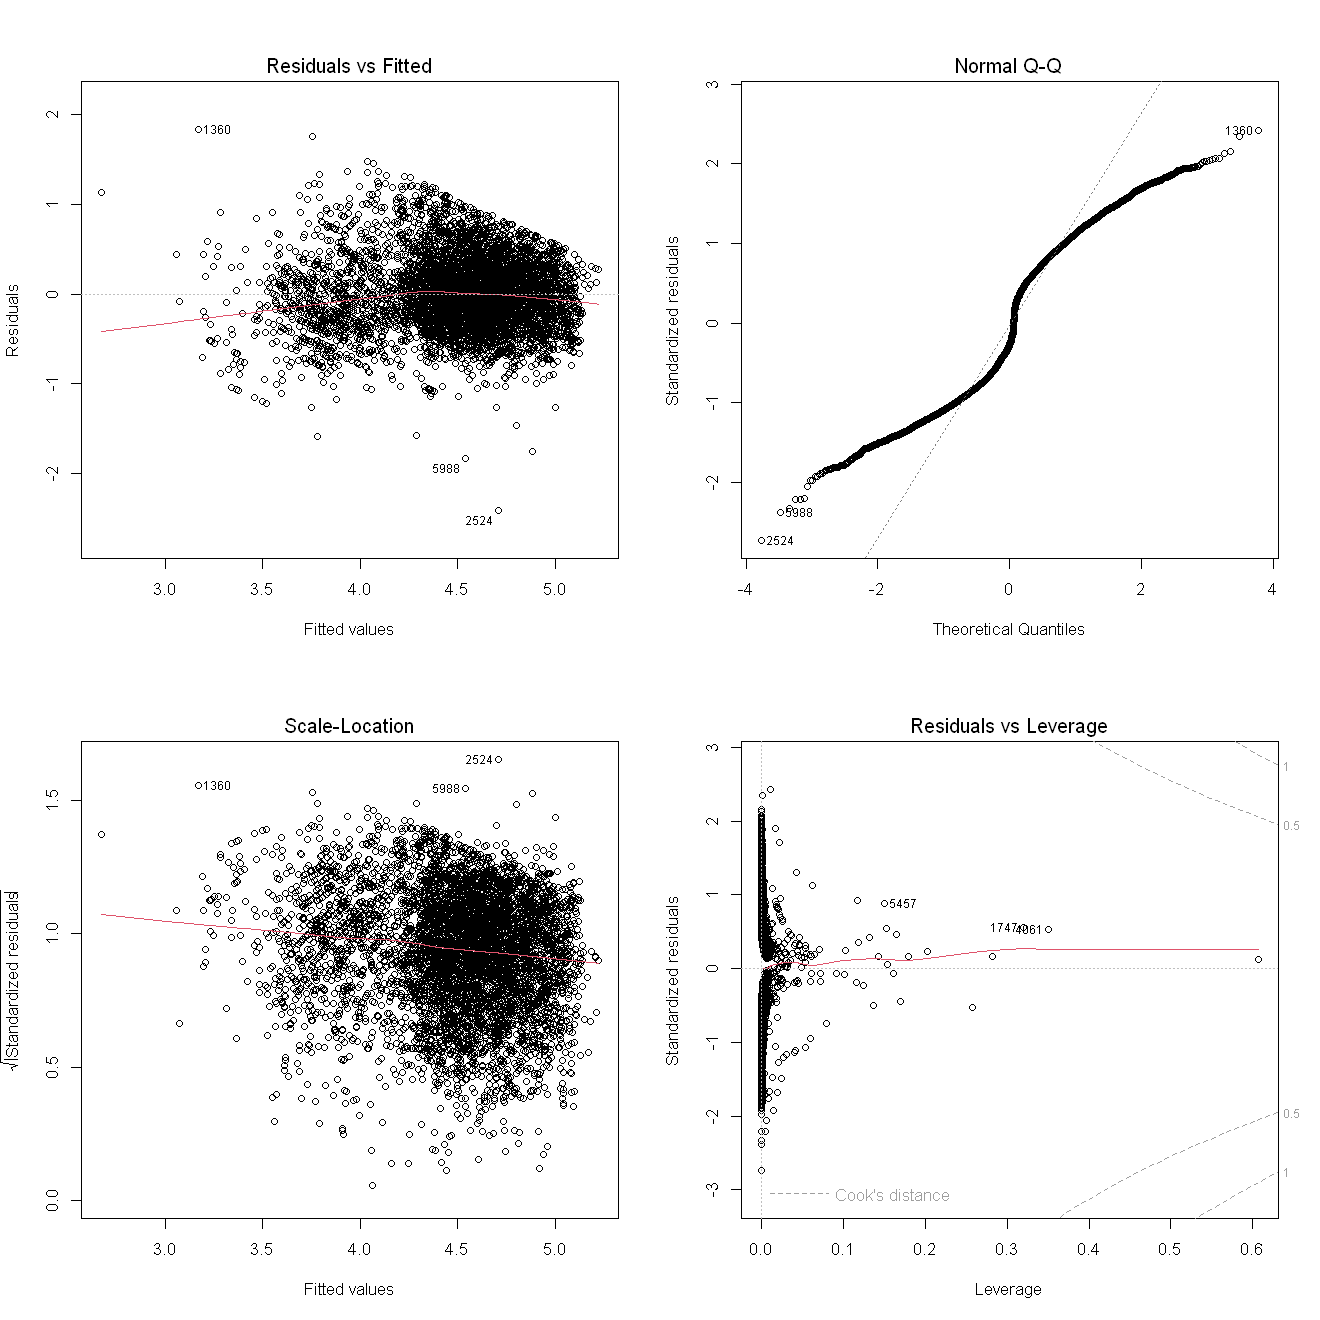

In [69]:
mean(modl10$residuals)
bptest(modl10)
bgtest(modl10)
jarque.bera.test(modl10$residuals)
par(mfrow=c(2,2)) 
plot(modl10)

1º pressuposto:  𝐻0 -> a média dos resíduos é zero;  𝐸(𝜖)=0 . É verificado uma vez que a média dos resíduos é muito baixa, aproximando-se muito de zero.

2º pressuposto:  𝐻0 -> variância constante;  𝑉𝑎𝑟(𝜖𝑖)=𝜎2𝜖=𝜎2 . Como o p-value é praticamente 0 e é inferior a 0.05, tomando 5% como nível de significância, rejeitamos a hipótese nula, então a variância não é constante. O gráfico assim deve apresentar uma estrutura em funil, pois há uma violação da homocedasticidade da variância no modelo em questão.

3º pressuposto:  𝐻0 -> ausência de autocorrelação;  𝐶𝑜𝑣(𝜖𝑖,𝜖𝑗)=0,(𝑖≠𝑗) . O p-value é inferior a 0.05, logo, rejeita-se a hipótese nula, significando que os resíduos estão autocorrelacionados.

4º pressuposto:  𝐻0 -> distribuição de probabilidades  𝜖  é normal;  𝜖≈𝑁(0,𝜎) . O 4º pressuposto, relativo ao teste de Jarque-Bera, também não é verificado, uma vez que o p-value é inferior a 0.05, que obriga à rejeição da hipótese nula. Assim, os resíduos não têm distribuição normal.

-------------------------------------------------------------------------------------------------------------------------------

Apesar de ter um $R^2$ muito alto comparativamente aos modelos anteriores a este, os pressupostos dos resíduos continuam a não serem verificados. Ainda, observa-se um aumento no valor da média dos resíduos, no 1º pressuposto, mas também um desajuste na distribuição normal, como observado no *QQ-Plot*.

Caracterizamos este como melhor modelo, para $\text {já}_{(1)}$, com pouca margem de evolução na realização de outros modelos. Por esta razão, paremos por aqui com a realização de modelos.



$(1)$- serão testados outros modelos in and out sample para verificar casos de *overfitting*, não podendo concluir em definitivo neste como sendo o melhor modelo   

$log(price)=4.52+2.423e^{-1} \times \text{dummy_room_typeHotel room}-6.603e^{-1} \times \text{dummy_room_typePrivate room}-1.057 \times \text{dummy_room_typeShared room}-1.674e^{-1} \times \text{log(minimum_nights)}+1.039e^{-4}\times\text{reviews_per_month} \times \text {number_of_reviews}+1.981e^{-2} \times\text{calculated_host_listings_count}-4.043e^{-4} \times \text{{calculated_host_listings_count}}^2+2.125e^{-6}\times \text{{calculated_host_listings_count}}^3+4.378e^{-4} \times\text{availability_365}+ 1.871e^{-1} \times \text{dummy_ng} \\\text {em que os pesos: weights}=\frac{1}{\text {residuals(modl6_1)}^{2}}$

## Erros de previsão

### 1) Visualização dos modelos

Em primeiro lugar, faremos uma análise dos modelos realizados com base no AIC e $R^2$, visto que os pressupostos dos resíduos são semelhantes para todos os modelos (média dos resíduos é nula).

In [ ]:
#########################################################################
Modelos <- c("baseline model","modelo 1","modelo 2","modelo 3","modelo 4","modelo 5","modelo 6","modelo 6.1.","modelo 6.2.","modelo 7","modelo 8","modelo 9","modelo 10")
AICs <- c(AIC(modelo),AIC(modl1),AIC(modl2),AIC(modl3),AIC(modl4),AIC(modl5),AIC(modl6),AIC(modl6_1),AIC(modl6_2),AIC(modl7),AIC(modl8),AIC(modl9),AIC(modl10))
r_squared <- c(summary(modelo)$r.squared,summary(modl1)$r.squared,summary(modl2)$r.squared,summary(modl3)$r.squared,
        summary(modl4)$r.squared,summary(modl5)$r.squared,summary(modl6)$r.squared,summary(modl6_1)$r.squared,
        summary(modl6_2)$r.squared,summary(modl7)$r.squared,summary(modl8)$r.squared,summary(modl9)$r.squared, 
        summary(modl10)$r.squared)
summary_modelos <- cbind(Modelos,"AICs"=round(AICs,4),"r_squared"=round(r_squared,4))
summary_modelos

Ao observar a tabela, verificamos que o modelo que se destaca é claramente o modelo 10, com o menor akaike (AIC) e com melhor/mais elevado $R^2$. Apesar de ser indiscutível que o modelo 10 é o melhor, teremos especial atenção também ao modelo 6.1. e ao modelo 8, pois apresentam valores consistentes das duas colunas mais à direita da tabela.

### 2) Erros de previsão in-sample

Agora, vamos calcular os erros de previsão de cada um dos modelos idealizados e construídos, a fim de estudar uma previsão in-sample, entre os modelos que temos.

Será necessário tomar atenção com os datasets utilizados em cada modelo (sevilla1, sevilla2 ou sevilla3), nos valores atuais e no número de linhas da variável alvo. Ainda, será necessário verificar se o preço está logaritmizado ou não, de forma a identificar se será preciso colocar exponencial nos *fitted.values* do modelo.

In [ ]:
actual1 <- sevilla1$price
actual2 <- sevilla2$price
actual3 <- sevilla3$price
n1 <- length(sevilla1$price)
n2 <- length(sevilla2$price)
n3 <- length(sevilla3$price)

predict0 <- (modelo$fitted.values)
predict1 <- (modl1$fitted.values)
predict2 <- (modl2$fitted.values)
predict3 <- exp(modl3$fitted.values) # necessário utilizar exponencial por causa dos logaritmos
predict4 <- exp(modl4$fitted.values)
predict5 <- exp(modl5$fitted.values)
predict6 <- exp(modl6$fitted.values)
predict6_1 <- exp(modl6_1$fitted.values)
predict6_2 <- exp(modl6_2$fitted.values)
predict7 <- exp(modl7$fitted.values)
predict8 <- exp(modl8$fitted.values)
predict9 <- exp(modl9$fitted.values)
predict10 <- exp(modl10$fitted.values)

MAPE0 <-(1/n1) * sum(abs((actual1 - predict0)/actual1))
MAPE1 <-(1/n1) * sum(abs((actual1 - predict1)/actual1))
MAPE2 <-(1/n2) * sum(abs((actual2 - predict2)/actual2))
MAPE3 <-(1/n2) * sum(abs((actual2 - predict3)/actual2))
MAPE4 <-(1/n2) * sum(abs((actual2 - predict4)/actual2))
MAPE5 <-(1/n3) * sum(abs((actual3 - predict5)/actual3))
MAPE6 <-(1/n3) * sum(abs((actual3 - predict6)/actual3))
MAPE6_1 <-(1/n3) * sum(abs((actual3 - predict6_1)/actual3))
MAPE6_2 <-(1/n3) * sum(abs((actual3 - predict6_2)/actual3))
MAPE7 <- (1/n3) * sum(abs((actual3 - predict7)/actual3))
MAPE8 <- (1/n3) * sum(abs((actual3 - predict8)/actual3))
MAPE9 <- (1/n3) * sum(abs((actual3 - predict9)/actual3))
MAPE10 <- (1/n3) * sum(abs((actual3 - predict10)/actual3))

MAPE_IS <- c(MAPE0,MAPE1,MAPE2,MAPE3,MAPE4 ,MAPE5,MAPE6,MAPE6_1,MAPE6_2,MAPE7,MAPE8,MAPE9,MAPE10)
MAPE_IS_percent <- c(MAPE_IS*100)

Criadas as variáveis com os erros médios associados às previsões, vai ser adicionada à tabela já existente os valores do MAPE in-sample.

In [ ]:
tb_c_mapeis <- cbind(summary_modelos,"MAPE In-Sample"=round(MAPE_IS,4),"MAPE In-Sample(%)"= round(MAPE_IS_percent,2))
tb_c_mapeis

Observando a tabela com as duas colunas do MAPE adicionadas (absoluto e percentual), podemos concluir que, numa previsão in-sample, o melhor modelo será o modelo 10. Quer pelas razões anteriores ($R^2$ elevado e AIC baixo), quer pelos valores do MAPE calculados agora, que não variam muito entre os modelos.

Passaremos agora para a previsão out-sample.

### 3) Erros de previsão out-sample

 Comecemos escolher uma seed porque estamos a manusear valores aleatórios e queremos que mantenha as mesmas características entre diferentes dispositivos.

In [ ]:
set.seed(895743)

Em seguida, vamos dividir o dataset em conjuntos de treino e teste através do comando da biblioteca caTools. Iremos dividir em 90% / 10%, para o conjunto treino e teste, respetivamente.

Serão utilizados para cálculo dos erros de previsão out-sample, os modelos 6.1., 7, 8 e 10; são caracterizados como os melhores, sendo isso visível na tabela anterior.

In [ ]:
#index = sample(1:nrow(sevilla3),round(0.70*nrow(sevilla3)))
#train_sv3 <- as.data.frame(sevilla3[index,])  # treino
#test_sv3 <- as.data.frame(sevilla3[-index,])  # teste

index = sample.split(sevilla3, SplitRatio = 0.9)
train_sv3 = sevilla3[index,]
test_sv3 = sevilla3[!index,]

Agora utilizaremos o conjunto de treino para os modelos e o conjunto de teste para as previsões. Após este processo, serão calculados os valores do MAPE (erros de previsão).

### Modelo 6.2. sobre o conjunto de treino e previsão segundo o conjunto de teste

Para cada um dos modelos a testar (6.1, 7, 8 e 10), serão chamados os modelos originais com a **data** no conjunto de treino e adicionados os pesos para os modelos que tinham pesos previamente (7,8 e 10).

In [ ]:
train6_1 <- lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+
    availability_365+dummy_ng, 
    data = train_sv3)

N <- length(train_sv3$log_price)
train7 <- lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = train_sv3 ,w = 1/((1:N)^0.5))

yhat = predict(train6_1, train_sv3)
w <- 1/sqrt(yhat)
train8 <- lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = train_sv3 ,weights = w)

h <- sqrt(train6_1$residuals^2)
train10 <- lm(formula = log_price ~ dummy_room_type + log_minimum_nights + 
    reviews_per_month*number_of_reviews + poly(calculated_host_listings_count,degree=3,raw=TRUE)+ availability_365
    + dummy_ng, 
    data = train_sv3 ,w = 1/h)

n3OS <- length(test_sv3$price)
actual3OS <- test_sv3$price

predictOS_6_1 <- exp(predict(train6_1,newdata=test_sv3))
predictOS_7 <- exp(predict(train7,newdata=test_sv3))
predictOS_8 <- exp(predict(train8,newdata=test_sv3))
predictOS_10 <- exp(predict(train10,newdata=test_sv3))

MAPE6_1OS <-(1/n3OS) * sum(abs((actual3OS - predictOS_6_1)/actual3OS))
MAPE7OS <-(1/n3OS) * sum(abs((actual3OS - predictOS_7)/actual3OS))
MAPE8OS <-(1/n3OS) * sum(abs((actual3OS - predictOS_8)/actual3OS))
MAPE10OS <-(1/n3OS) * sum(abs((actual3OS - predictOS_10)/actual3OS))

MAPE_OS1 <- c(MAPE6_1OS,MAPE7OS,MAPE8OS,MAPE10OS)
MAPE_OS_percent1 <- c(MAPE_OS1*100)


Conseguimos observar que, para a divisão efetuada nos conjuntos, os erros de previsão dos modelos foram bastante semelhantes aos dos modelos com o dataset original. Por esta razão, dizemos que o conjunto de treino consegue prever bem o conjunto de teste, não existindo casos de underfitting ou overfitting.


Foi criada a tabela com os valores MAPE, absolutos e percentuais, das previsões out-sample dos modelos.  

In [ ]:
Modelos1 <- c("modelo 6.1.","modelo 7","modelo 8","modelo 10")
AICs1 <- c(AIC(modl6_1),AIC(modl7),AIC(modl8),AIC(modl10))
r_squared1 <- c(summary(modl6_1)$r.squared,summary(modl7)$r.squared,summary(modl8)$r.squared, 
        summary(modl10)$r.squared)
MAPE_IS1 <- c(MAPE6_1,MAPE7,MAPE8,MAPE10)
MAPE_IS_percent1 <- c(MAPE_IS1*100)
summary_modelos1 <- cbind(Modelos1,"AICs"=round(AICs1,4),"r_squared"=round(r_squared1,4),
                         "MAPE in-sample"=round(MAPE_IS1,4),"MAPE in-sample(%)"=round(MAPE_IS_percent1,2),
                         "MAPE out-sample"=round(MAPE_OS1,4),"MAPE out-sample(%)"=round(MAPE_OS_percent1,2))
summary_modelos1

## Previsão in-sample escolhida

Tal como dito anteriormente, será utilizado o modelo 10 para previsão in_sample, desenhando os valores preditivos para uma amostra de 500 valores.

In [ ]:
# Modelo 10, modelo com peso 1/h e preço logaritmizado
pr10 <-predict(modl10,sevilla3)
plot(exp(pr10), type = "b", frame = FALSE, pch = 19, col = "red",xlim=c(0,200), 
     main="Previsão in-sample do modelo 10",xlab="Valor do preço do airbnb", ylab="Registos",ylim=c(0,200))

lines(sevilla3$price, pch = 18, col = "dark green", type = "b", lty = 2,xlim=c(0,200))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "dark green"), lty = 1:2, cex=0.8)

## Previsão out-sample escolhida

In [ ]:
pr10_n <-predict(train10,test_sv3)
plot(exp(pr10_n), type = "b", frame = FALSE, pch = 19, col = "red",xlim=c(0,200), 
     main="Previsão out-sample do modelo 10",xlab="Valor do preço do airbnb", ylab="Registos",ylim=c(0,200))
lines(test_sv3$price, pch = 18, col = "dark green", type = "b", lty = 2, , xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), col=c("red", "dark green"), lty = 1:2, cex=0.8)

## Exportação do dataset final para um csv 

In [ ]:
write.csv2(sevilla3,"sevilla.csv",row.names = TRUE)